In [ ]:
import pandas as pd 
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("city_day.csv")
print(Counter(data['City']))
# data_bangalore=data.loc[data['City']=='bangalore']
data_bangalore=data.loc[data['City']=='Bengaluru']
data_delhi=data.loc[data['City']=='Delhi']

Counter({'Ahmedabad': 2009, 'Bengaluru': 2009, 'Chennai': 2009, 'Delhi': 2009, 'Lucknow': 2009, 'Mumbai': 2009, 'Hyderabad': 2006, 'Patna': 1858, 'Gurugram': 1679, 'Visakhapatnam': 1462, 'Amritsar': 1221, 'Jorapokhar': 1169, 'Jaipur': 1114, 'Thiruvananthapuram': 1112, 'Amaravati': 951, 'Brajrajnagar': 938, 'Talcher': 925, 'Kolkata': 814, 'Guwahati': 502, 'Coimbatore': 386, 'Shillong': 310, 'Chandigarh': 304, 'Bhopal': 289, 'Ernakulam': 162, 'Kochi': 162, 'Aizawl': 113})


In [ ]:
data_bangalore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 4294 to 6302
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       1863 non-null   float64
 3   PM10        1649 non-null   float64
 4   NO          2003 non-null   float64
 5   NO2         2003 non-null   float64
 6   NOx         2005 non-null   float64
 7   NH3         1806 non-null   float64
 8   CO          1998 non-null   float64
 9   SO2         2003 non-null   float64
 10  O3          1865 non-null   float64
 11  Benzene     1743 non-null   float64
 12  Toluene     1916 non-null   float64
 13  Xylene      0 non-null      float64
 14  AQI         1910 non-null   float64
 15  AQI_Bucket  1910 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


In [ ]:
data_bangalore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 4294 to 6302
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        2009 non-null   object 
 1   Date        2009 non-null   object 
 2   PM2.5       1863 non-null   float64
 3   PM10        1649 non-null   float64
 4   NO          2003 non-null   float64
 5   NO2         2003 non-null   float64
 6   NOx         2005 non-null   float64
 7   NH3         1806 non-null   float64
 8   CO          1998 non-null   float64
 9   SO2         2003 non-null   float64
 10  O3          1865 non-null   float64
 11  Benzene     1743 non-null   float64
 12  Toluene     1916 non-null   float64
 13  Xylene      0 non-null      float64
 14  AQI         1910 non-null   float64
 15  AQI_Bucket  1910 non-null   object 
dtypes: float64(13), object(3)
memory usage: 266.8+ KB


In [ ]:
data_bangalore.drop(["Benzene", "Toluene", "Xylene", "AQI_Bucket", "City"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_bangalore["Date"] = pd.to_datetime(data_bangalore["Date"], format="%Y-%m-%d", errors="coerce")
assert data_bangalore["Date"].dtype == "datetime64[ns]"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_bangalore.set_index("Date", inplace=True)

In [ ]:
data_bangalore

PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2     O3   AQI
Date                                                                           
2015-01-01    NaN    NaN   3.26  17.33  10.88  20.36   0.33   3.54  10.73   NaN
2015-01-02    NaN    NaN   6.05  19.73  14.14  23.74   1.35   3.97  22.77   NaN
2015-01-03    NaN    NaN  11.91  19.88  20.72   4.32  17.40  13.61  12.03   NaN
2015-01-04    NaN    NaN   7.45  21.61  16.88   0.87   5.05   6.52  17.70   NaN
2015-01-05    NaN    NaN   9.52  22.17  21.76  31.38   1.83   4.71  12.72   NaN
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   ...
2020-06-27  16.60  29.48   3.06  13.68  13.07   6.88   0.67   7.29  15.69  51.0
2020-06-28  20.44  26.34   2.69  10.33  10.58   6.58   0.66   6.60  17.59  61.0
2020-06-29  28.68  29.27   3.62  12.12  12.94   6.80   0.56   6.33  16.99  65.0
2020-06-30  14.47  24.26   4.61  12.69  15.00   6.82   0.56   6.45  16.08  63.0
2020-07-01  17.50  30.48   3.95  13.25  14.83   7.42   0.54   6.66  15.40  43.0

[2009 rows x 10 columns]

In [ ]:
data_bangalore.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1863 non-null   float64
 1   PM10    1649 non-null   float64
 2   NO      2003 non-null   float64
 3   NO2     2003 non-null   float64
 4   NOx     2005 non-null   float64
 5   NH3     1806 non-null   float64
 6   CO      1998 non-null   float64
 7   SO2     2003 non-null   float64
 8   O3      1865 non-null   float64
 9   AQI     1910 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB


In [ ]:
data_delhi.drop(["Benzene", "Toluene", "Xylene", "AQI_Bucket", "City"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_delhi["Date"] = pd.to_datetime(data_delhi["Date"], format="%Y-%m-%d", errors="coerce")
assert data_delhi["Date"].dtype == "datetime64[ns]"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi.set_index("Date", inplace=True)

#Imputation of Missing Values

In [ ]:
def compare_dists(original_dist, imputed_dists: dict):
    """
    Plot original_dist and imputed_dists on top of each other
    to see the difference in distributions.
    """
    fig, ax = plt.subplots(figsize=(12, 7), dpi=140)
    # Plot the original
    sns.kdeplot(
        original_dist, linewidth=5, ax=ax, color="black", label="Original dist."
    )
    for key, value in imputed_dists.items():
        sns.kdeplot(value, linewidth=3, label=key, ax=ax)

    plt.legend()
    plt.show();

In [ ]:
# Choose 200 random
random_indices = np.random.choice([_ for _ in range(len(data_bangalore))], size=200)
clone = data_bangalore.copy(deep=True)
# Mark the indices as missing
clone.iloc[random_indices, 0] = np.nan

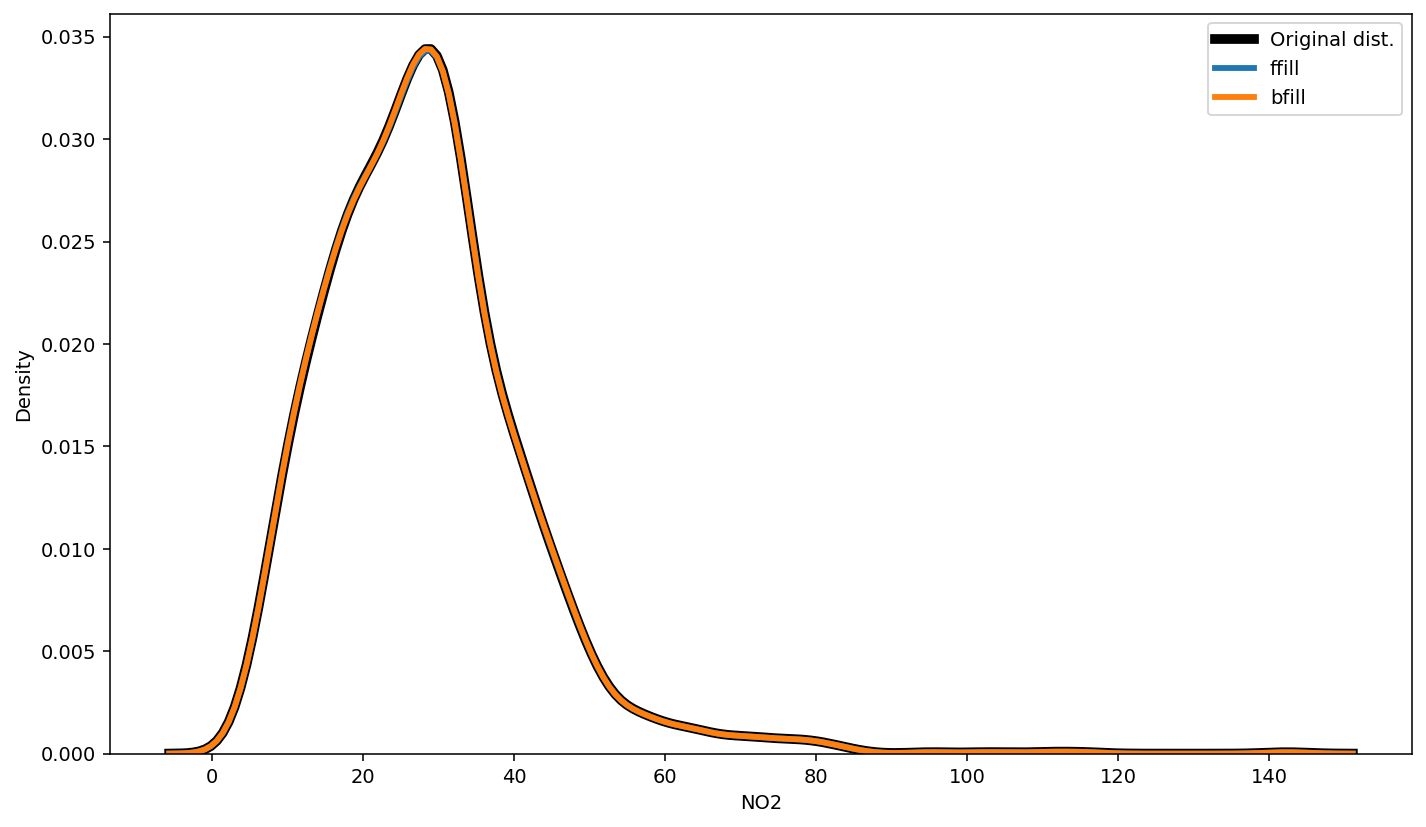

In [ ]:
clone2 = data_bangalore.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NO2'].{method}()")

compare_dists(data_bangalore["NO2"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_bangalore['NO2']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


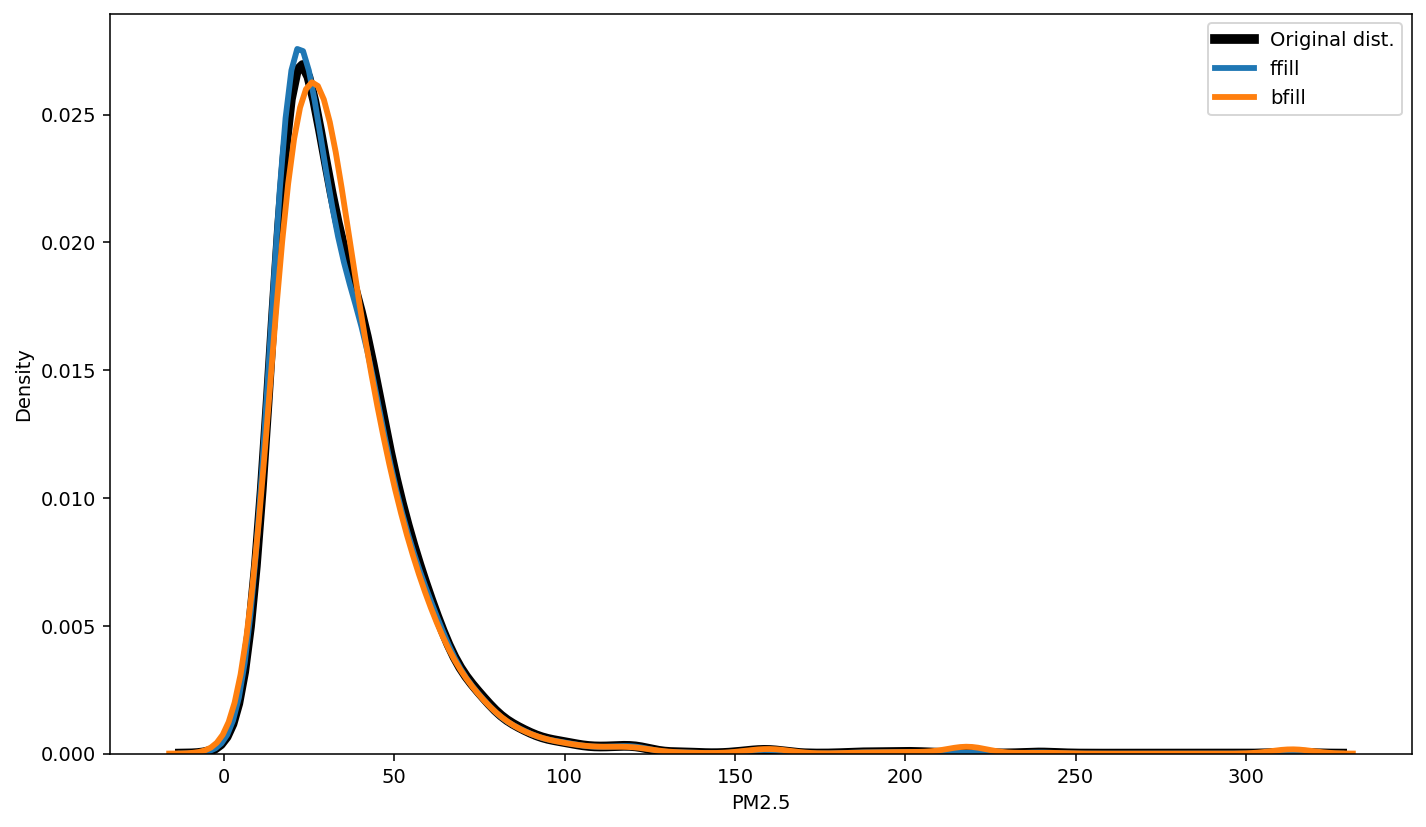

In [ ]:
clone2 = data_bangalore.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['PM2.5'].{method}()")

compare_dists(data_bangalore["PM2.5"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_bangalore['PM2.5']=clone2['ffill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


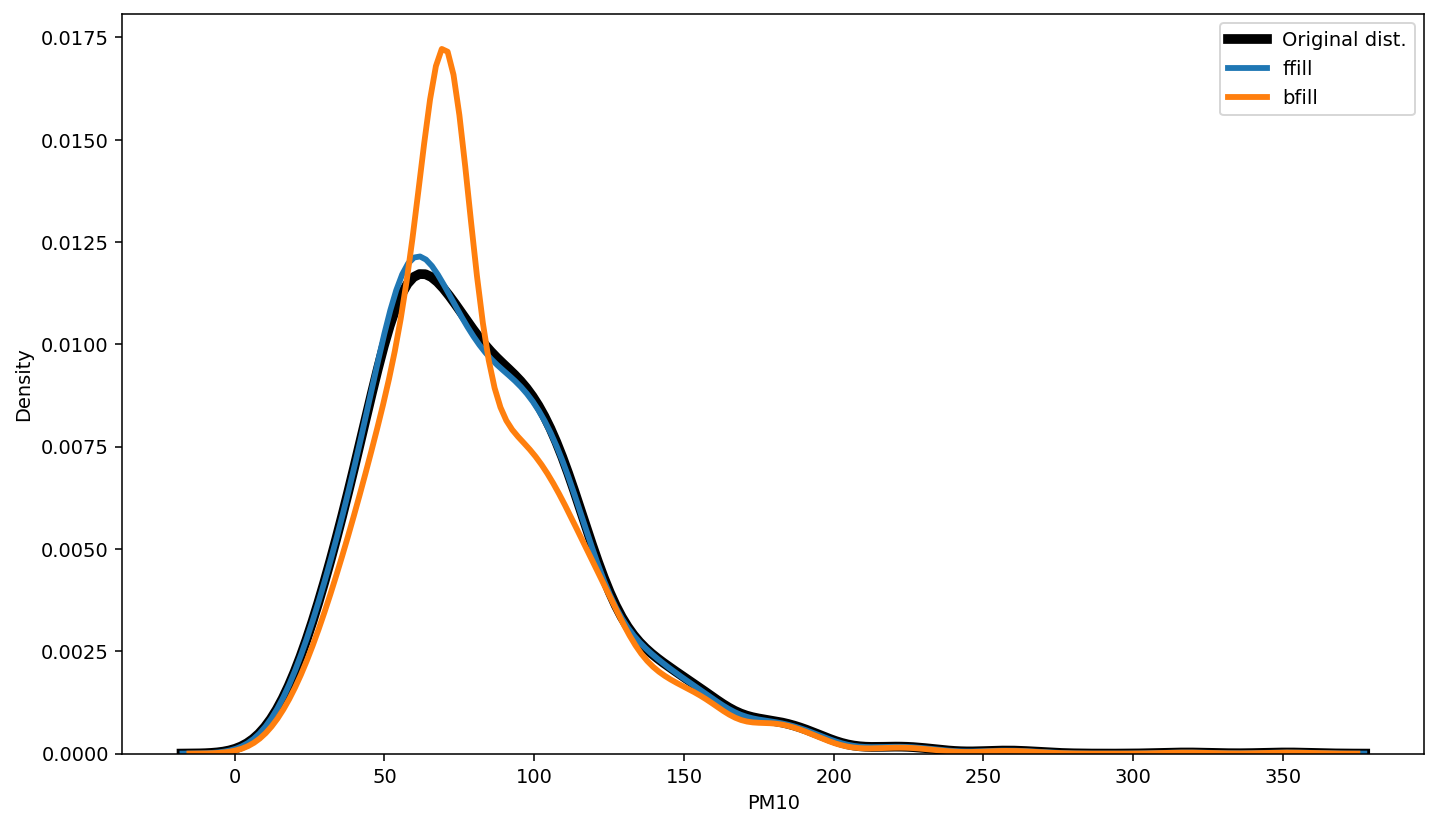

In [ ]:
clone2 = data_bangalore.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['PM10'].{method}()")

compare_dists(data_bangalore["PM10"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_bangalore['PM10']=clone2['ffill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


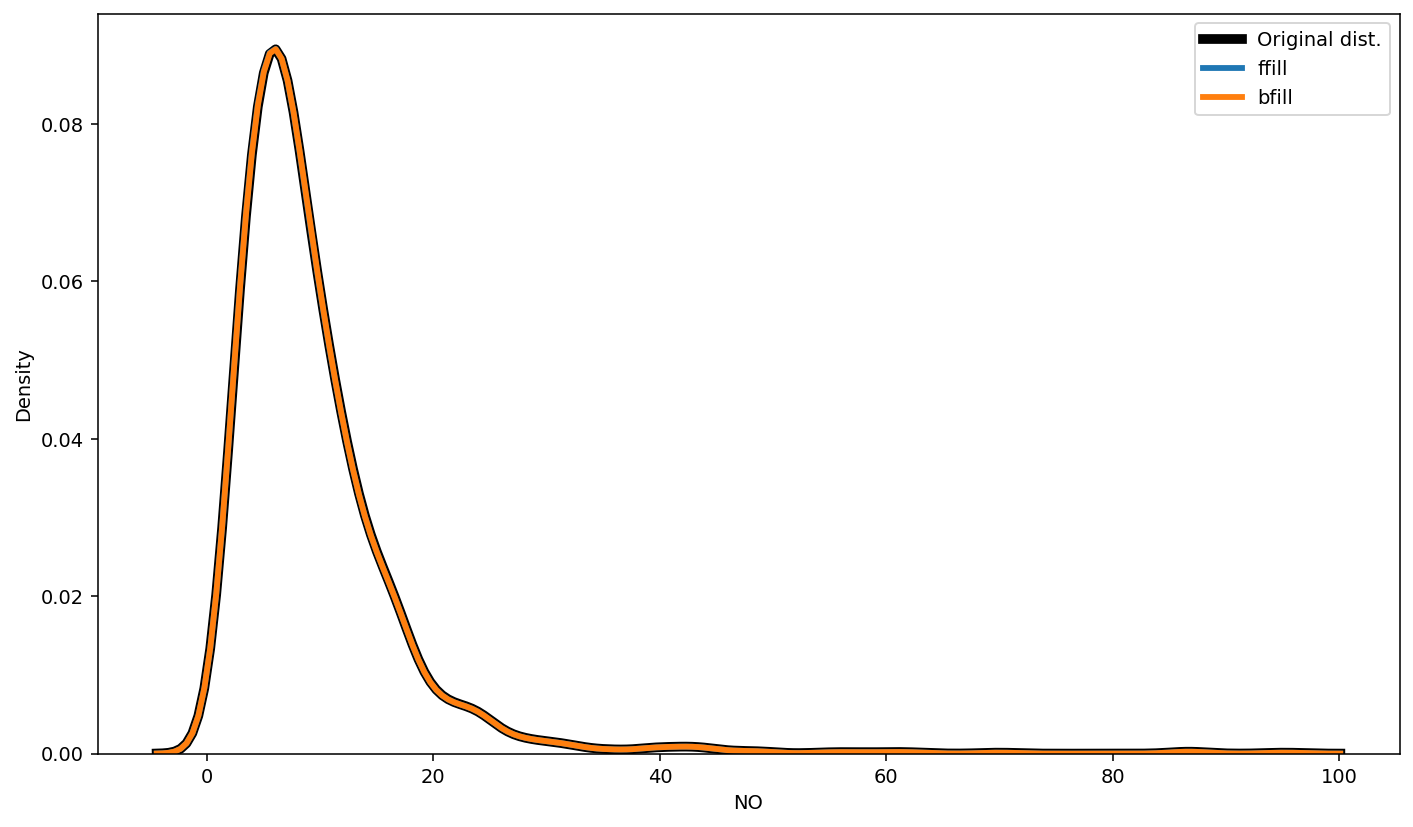

In [ ]:
clone2 = data_bangalore.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NO'].{method}()")

compare_dists(data_bangalore["NO"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_bangalore['NO']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


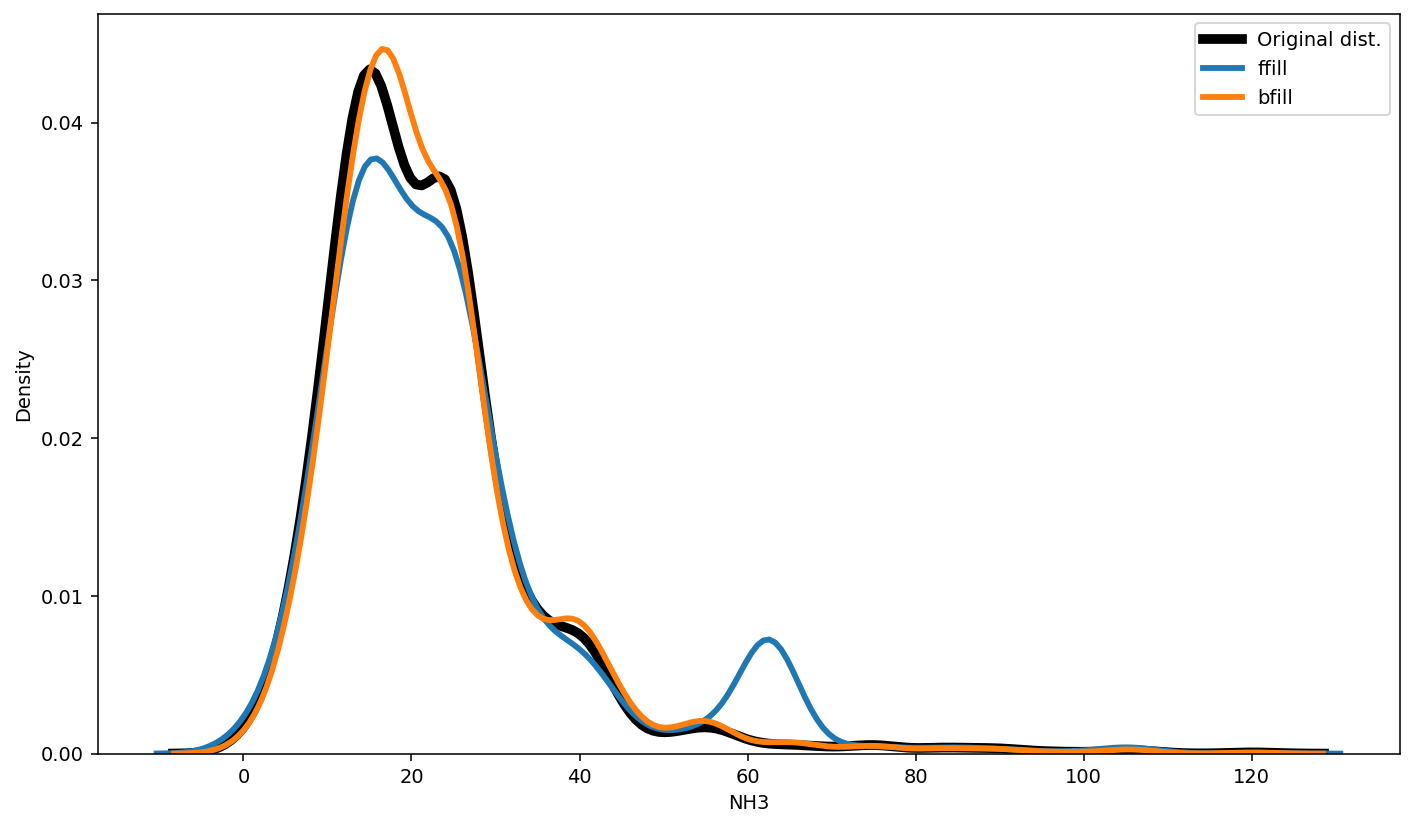

In [ ]:
clone2 = data_bangalore.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NH3'].{method}()")

compare_dists(data_bangalore["NH3"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_bangalore['NH3']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


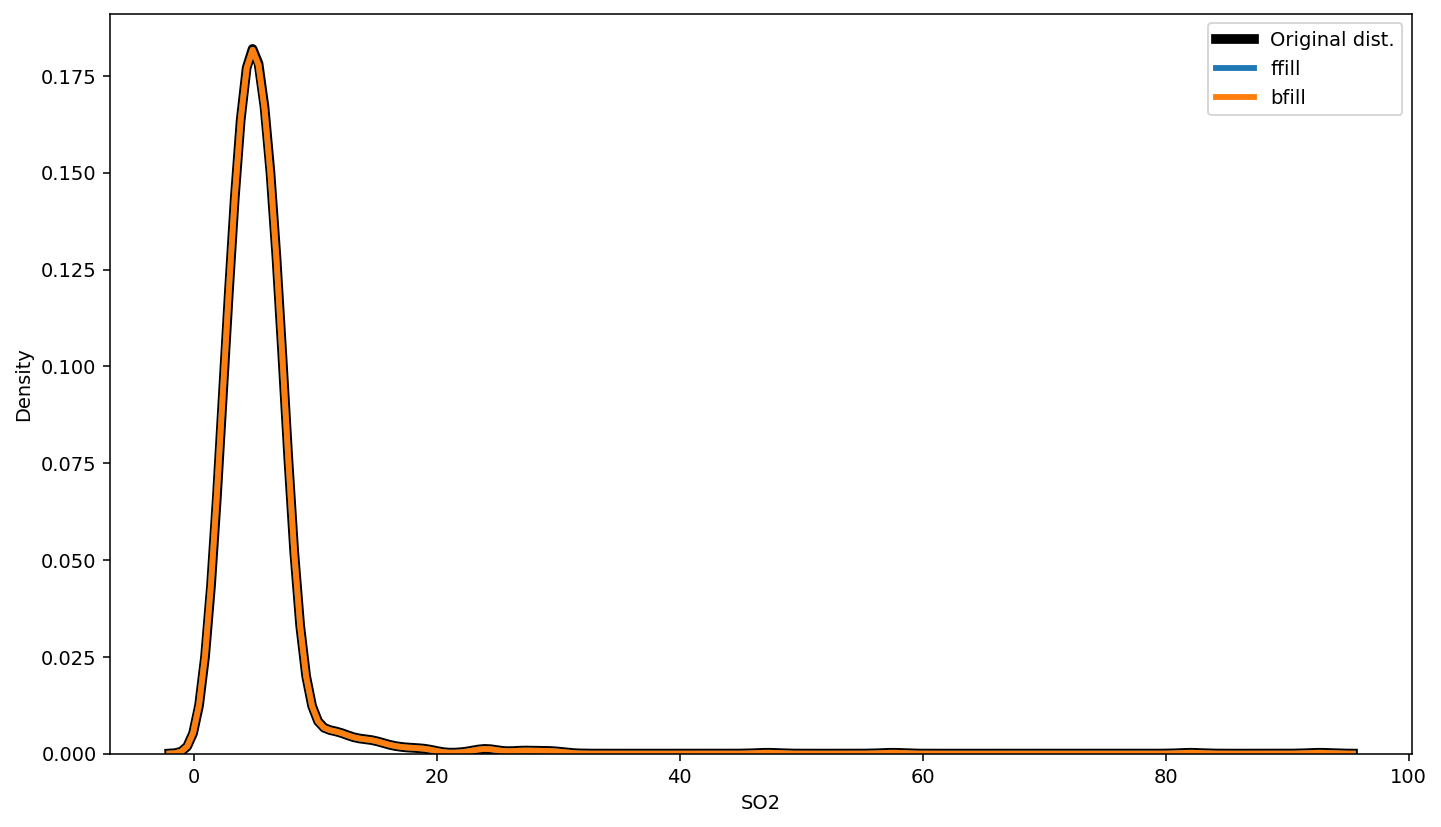

In [ ]:
clone2 = data_bangalore.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['SO2'].{method}()")

compare_dists(data_bangalore["SO2"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_bangalore['SO2']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


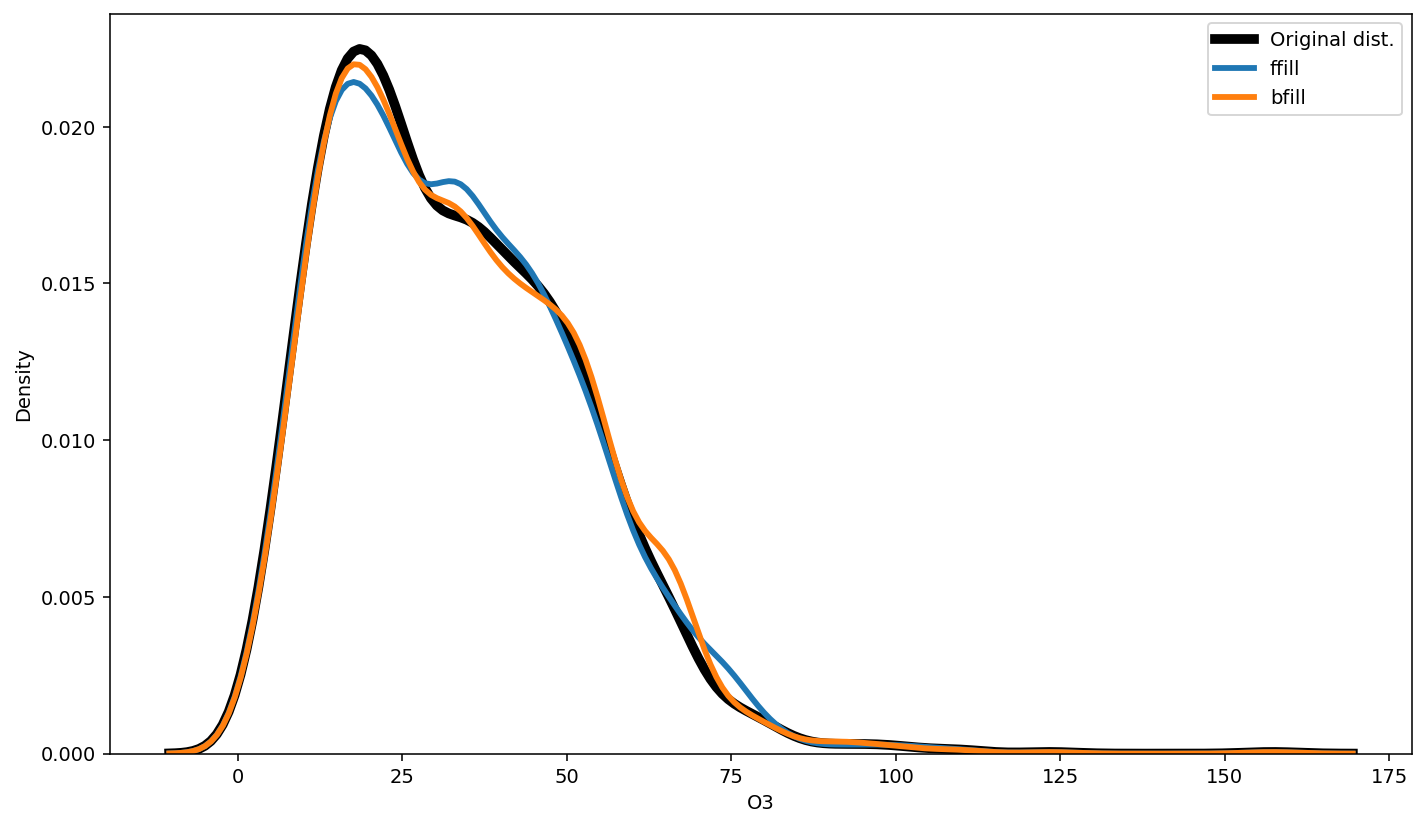

In [ ]:
clone2 = data_bangalore.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['O3'].{method}()")

compare_dists(data_bangalore["O3"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_bangalore['O3']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


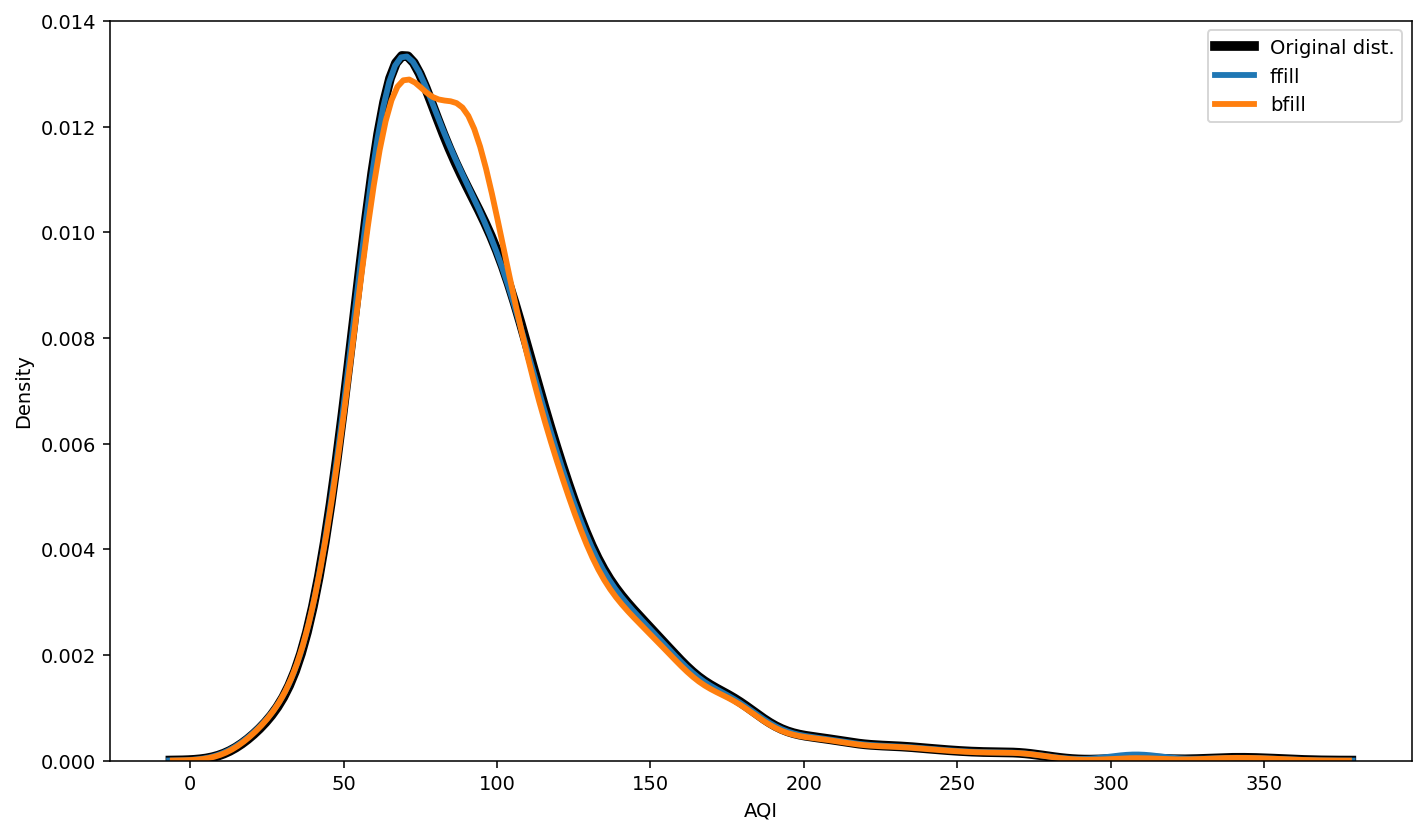

In [ ]:
clone2 = data_bangalore.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['AQI'].{method}()")

compare_dists(data_bangalore["AQI"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_bangalore['AQI']=clone2['ffill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_bangalore.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1931 non-null   float64
 1   PM10    1699 non-null   float64
 2   NO      2009 non-null   float64
 3   NO2     2009 non-null   float64
 4   NOx     2005 non-null   float64
 5   NH3     2009 non-null   float64
 6   CO      1998 non-null   float64
 7   SO2     2009 non-null   float64
 8   O3      2009 non-null   float64
 9   AQI     1930 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB


In [ ]:
data_bangalore['PM2.5'].fillna((data_bangalore['PM2.5'].median()), inplace=True)
data_bangalore['PM10'].fillna((data_bangalore['PM10'].median()), inplace=True)
data_bangalore['NOx'].fillna((data_bangalore['NOx'].mean()), inplace=True)
data_bangalore['CO'].fillna((data_bangalore['CO'].mean()), inplace=True)
data_bangalore['AQI'].fillna((data_bangalore['AQI'].mean()), inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
data_bangalore.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2009 non-null   float64
 1   PM10    2009 non-null   float64
 2   NO      2009 non-null   float64
 3   NO2     2009 non-null   float64
 4   NOx     2009 non-null   float64
 5   NH3     2009 non-null   float64
 6   CO      2009 non-null   float64
 7   SO2     2009 non-null   float64
 8   O3      2009 non-null   float64
 9   AQI     2009 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB


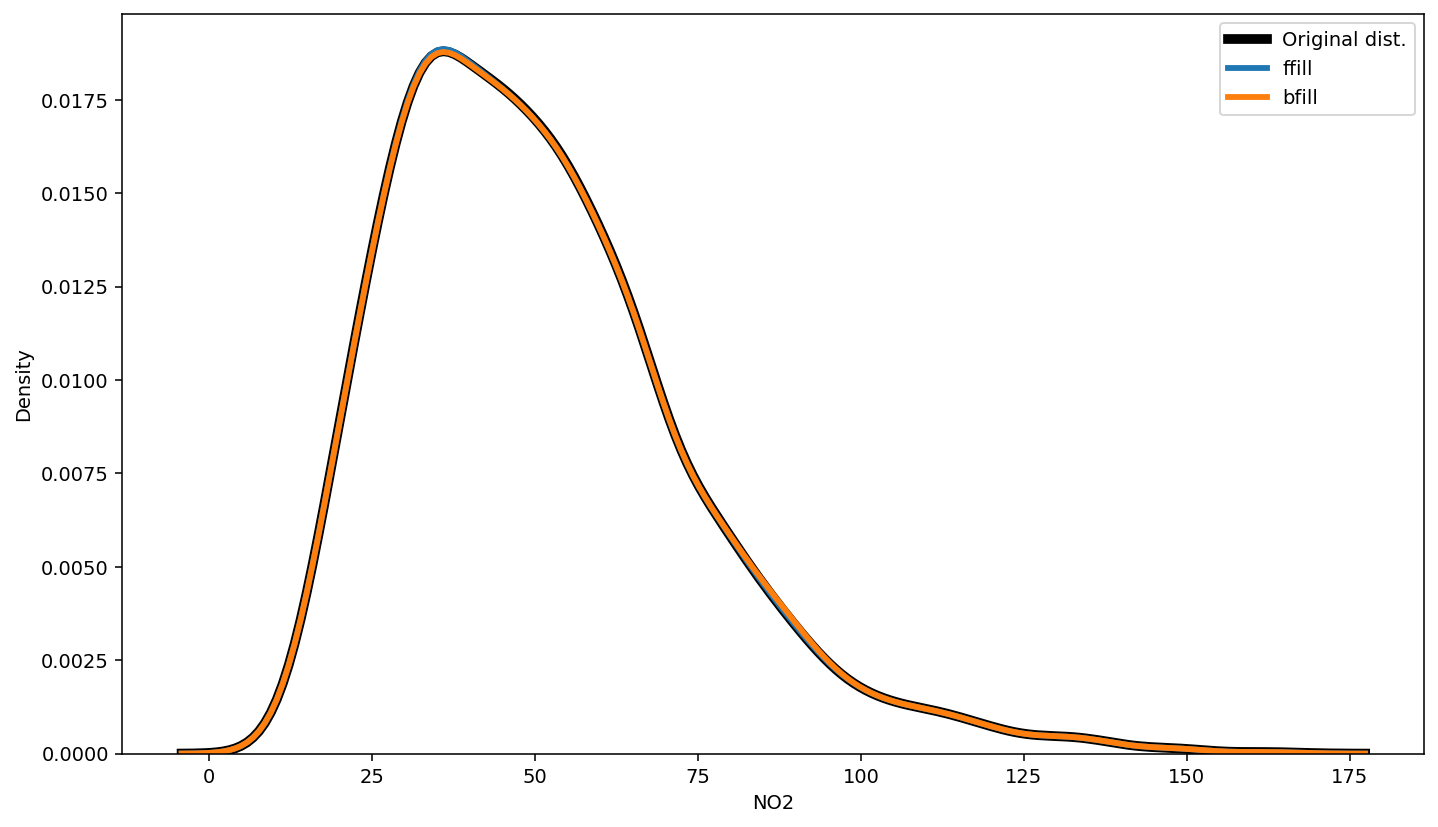

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NO2'].{method}()")

compare_dists(data_delhi["NO2"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['NO2']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


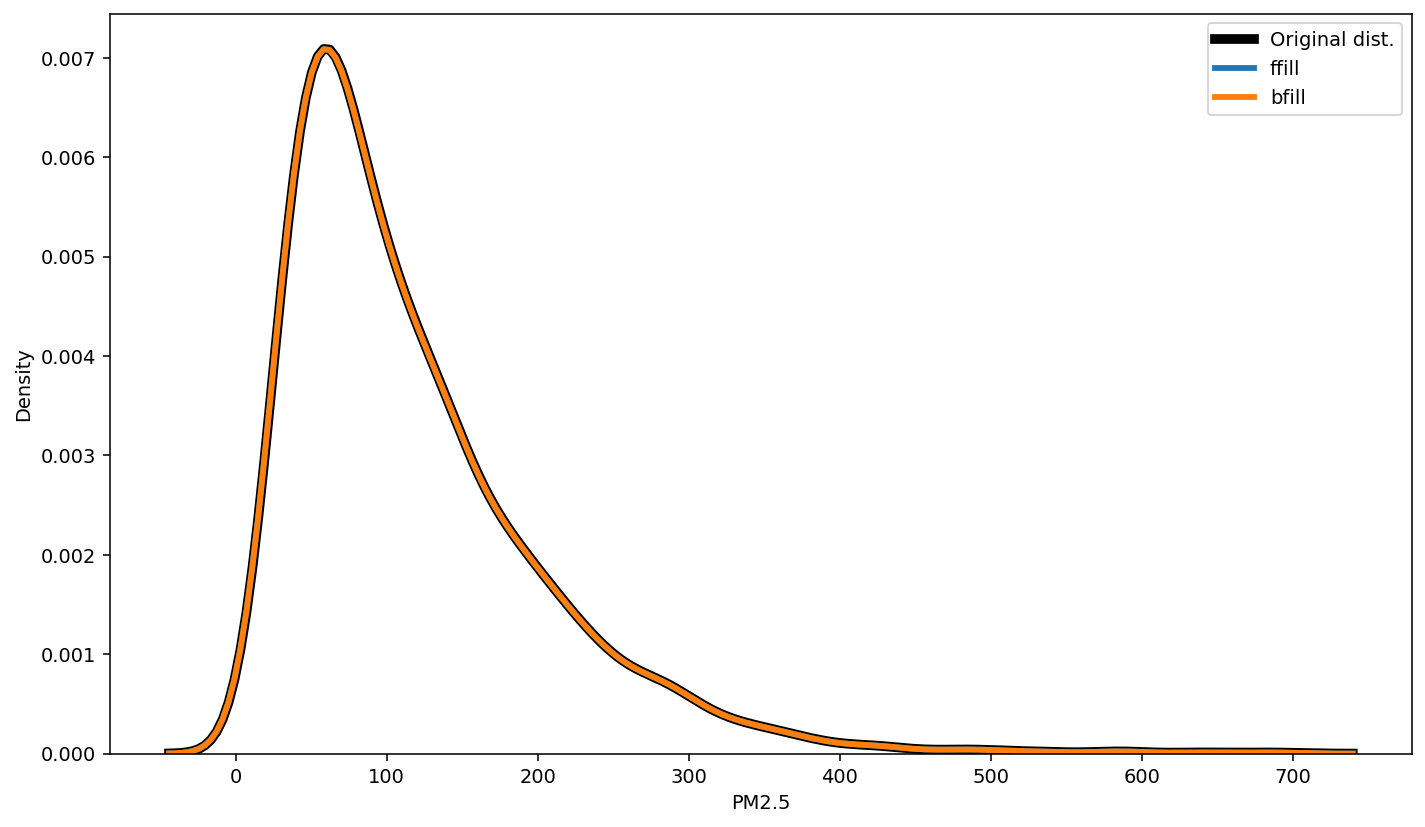

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['PM2.5'].{method}()")

compare_dists(data_delhi["PM2.5"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['PM2.5']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


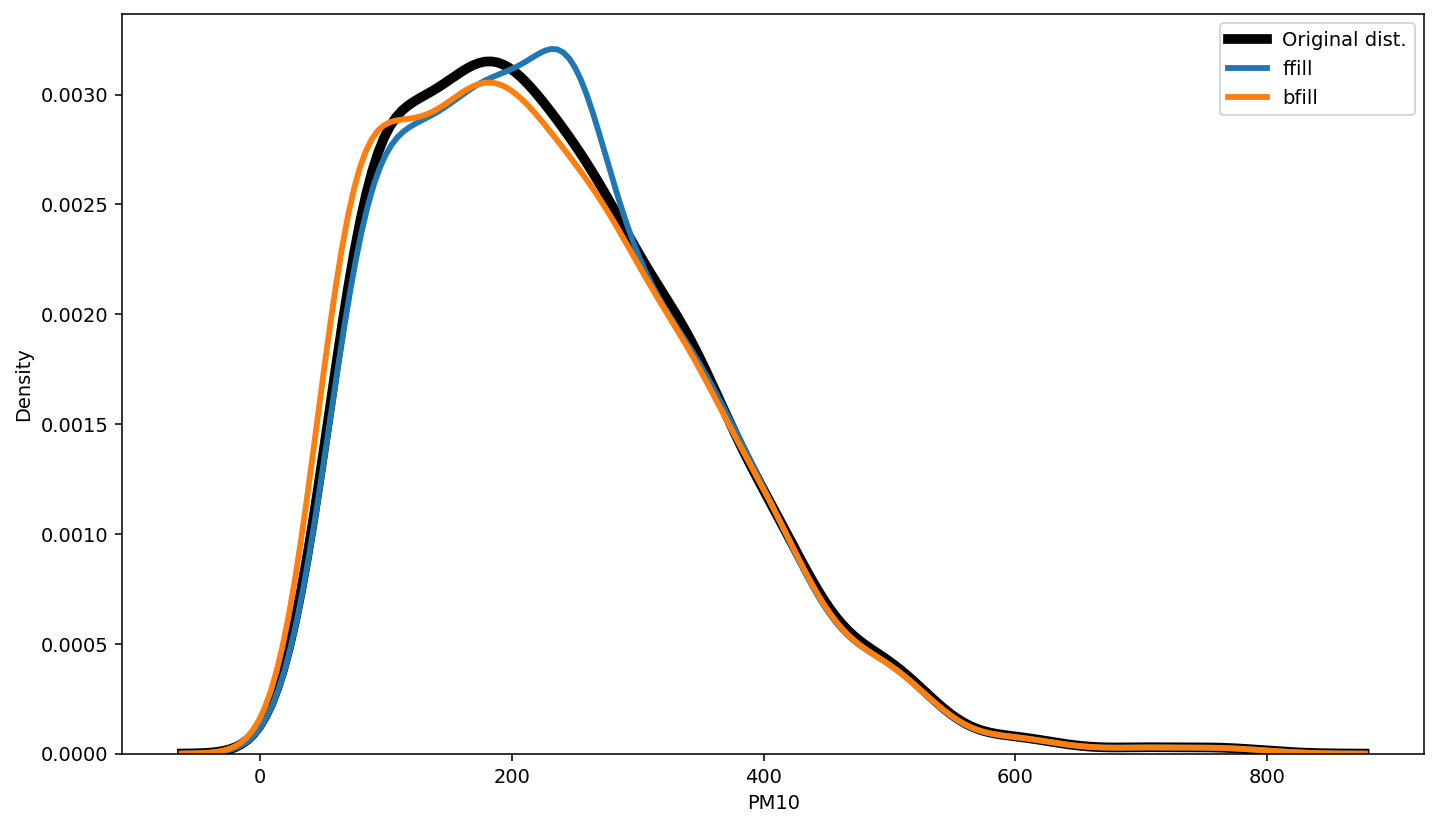

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['PM10'].{method}()")

compare_dists(data_delhi["PM10"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['PM10']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


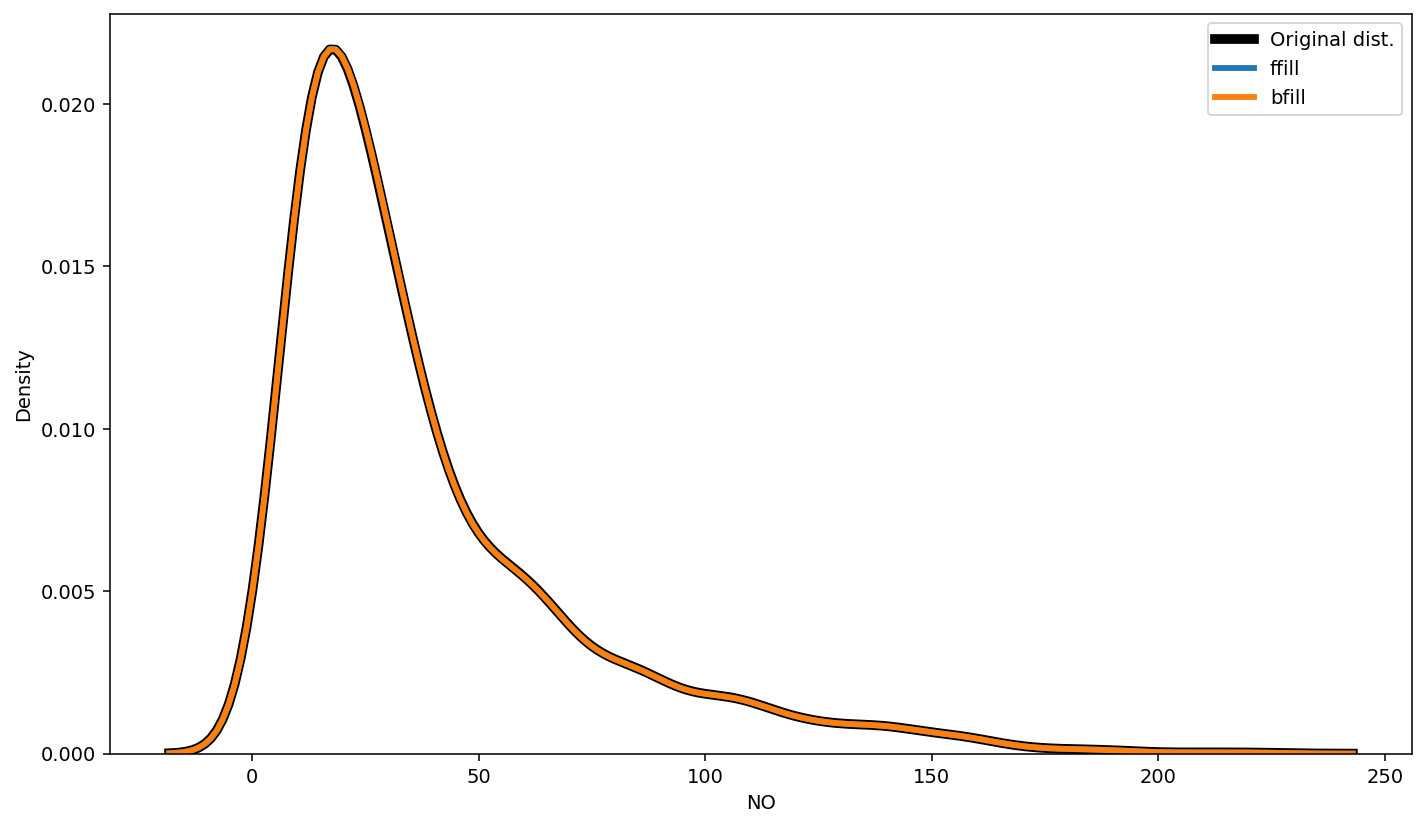

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NO'].{method}()")

compare_dists(data_delhi["NO"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['NO']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


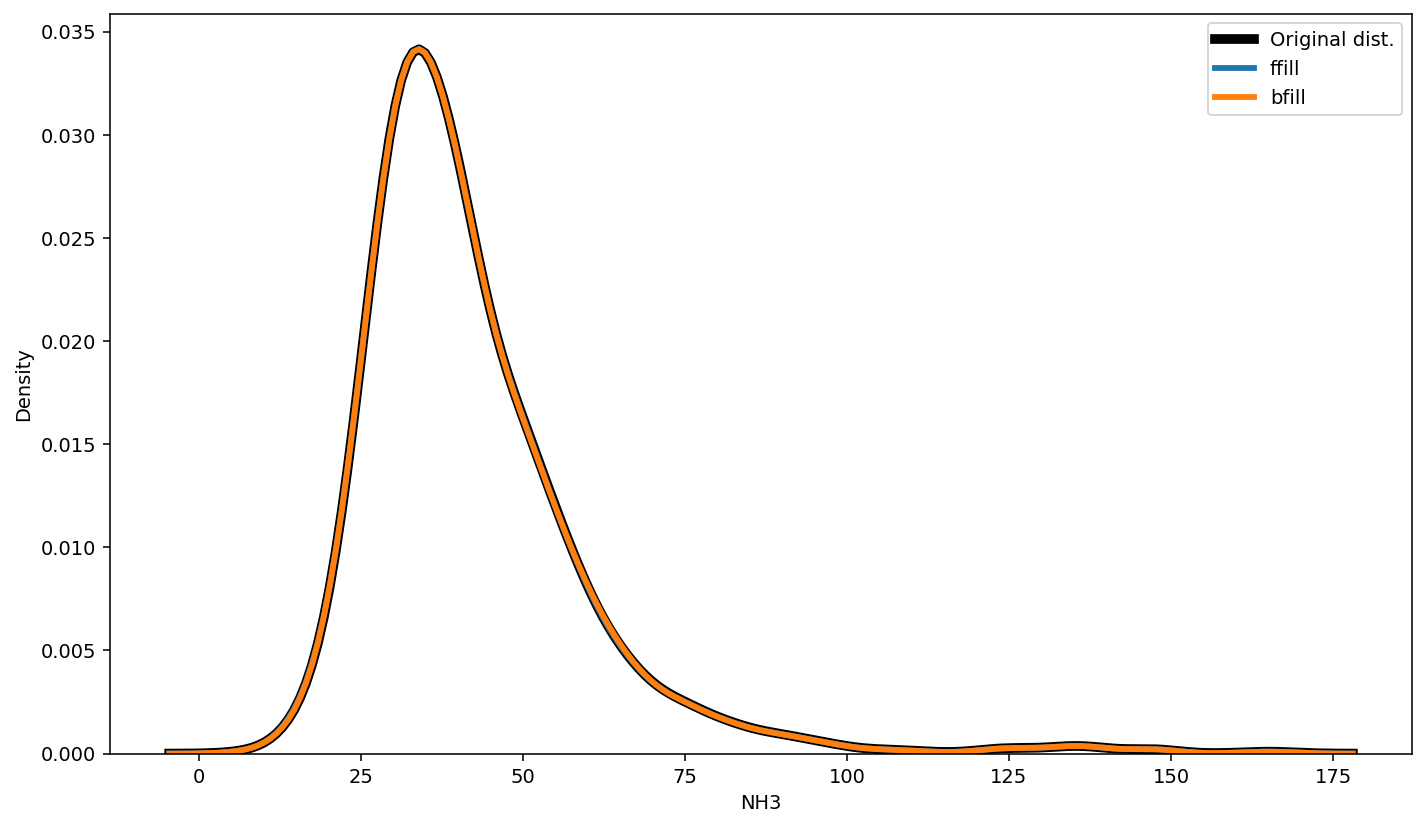

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['NH3'].{method}()")

compare_dists(data_delhi["NH3"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['NH3']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


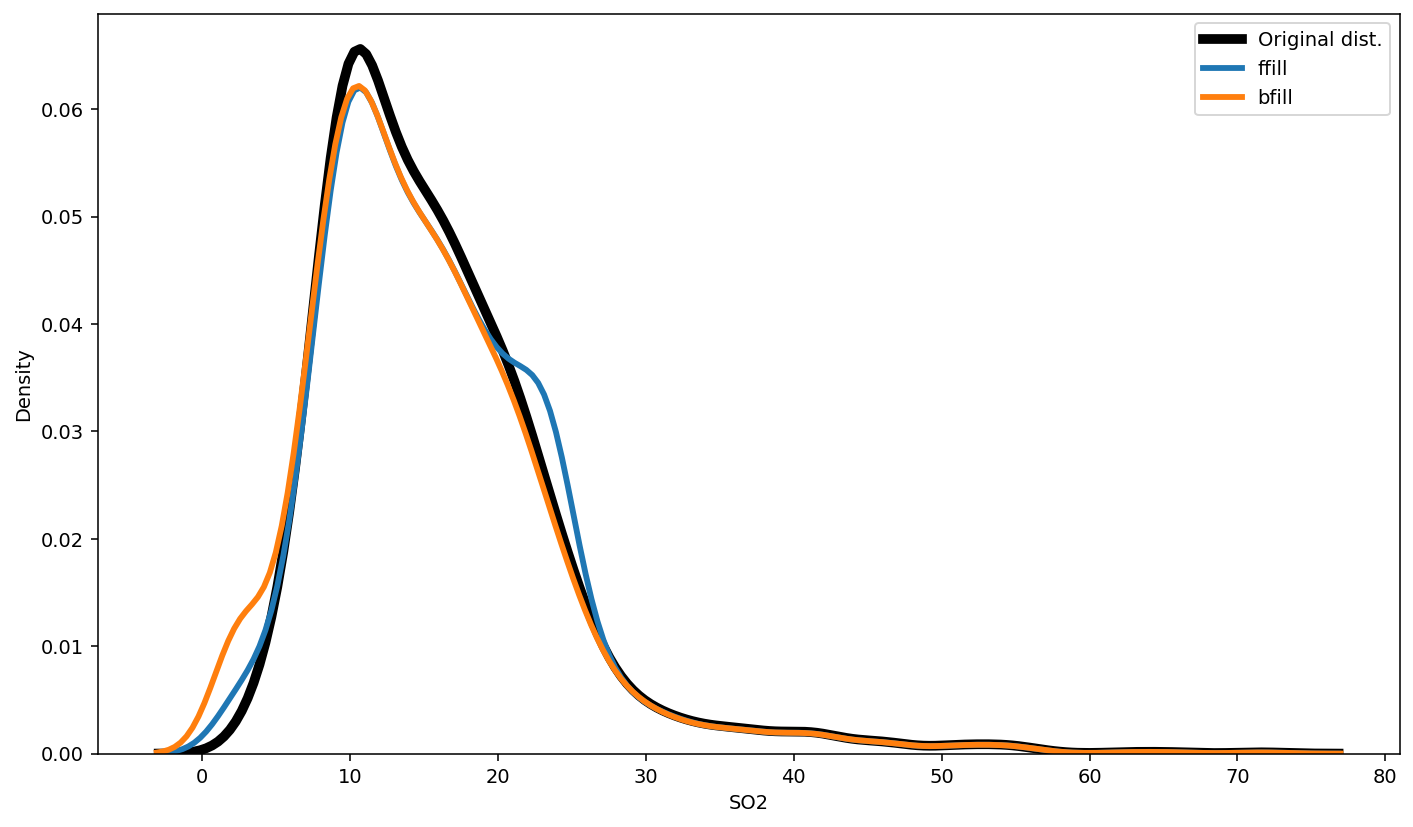

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['SO2'].{method}()")

compare_dists(data_delhi["SO2"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['SO2']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


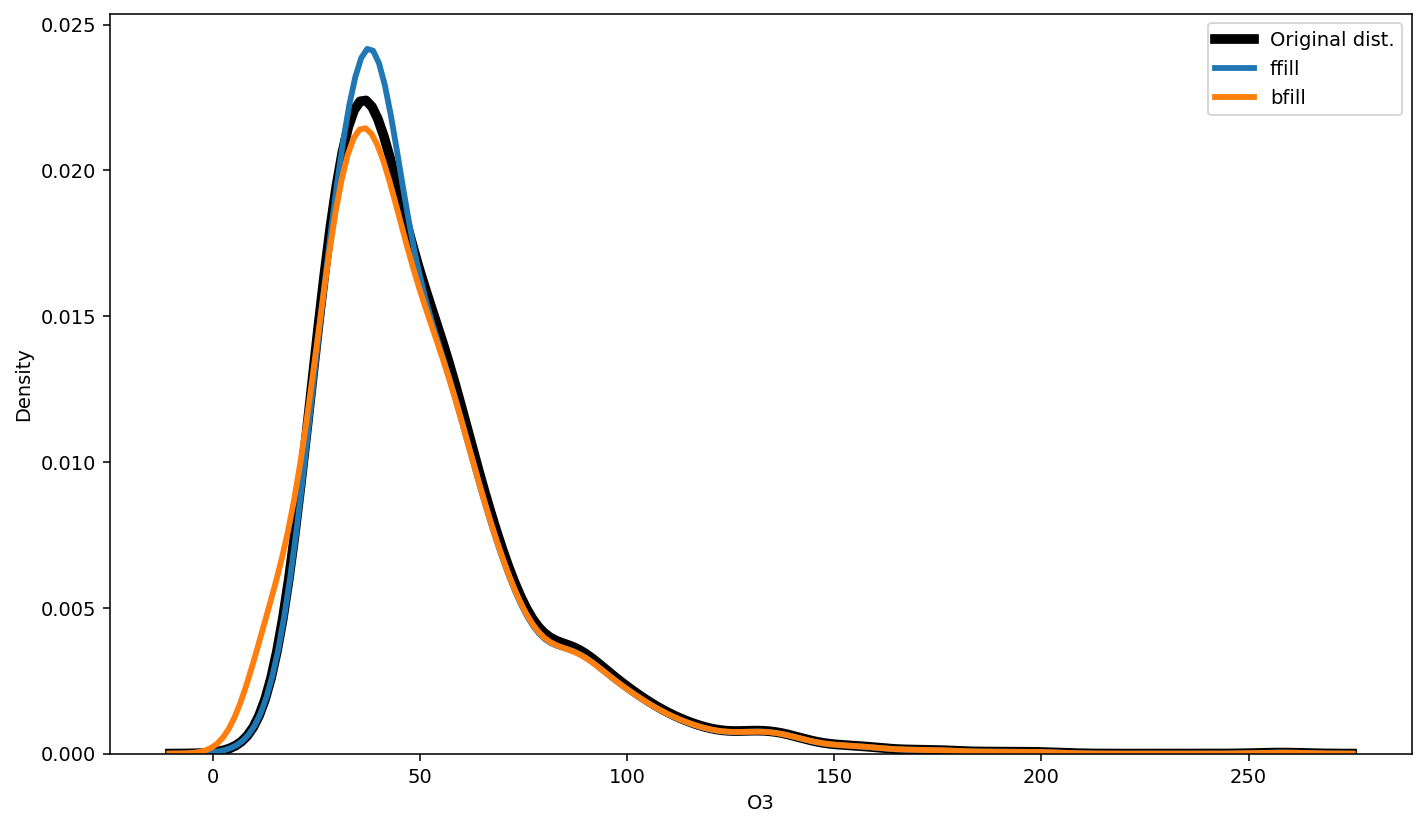

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['O3'].{method}()")

compare_dists(data_delhi["O3"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['O3']=clone2['ffill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


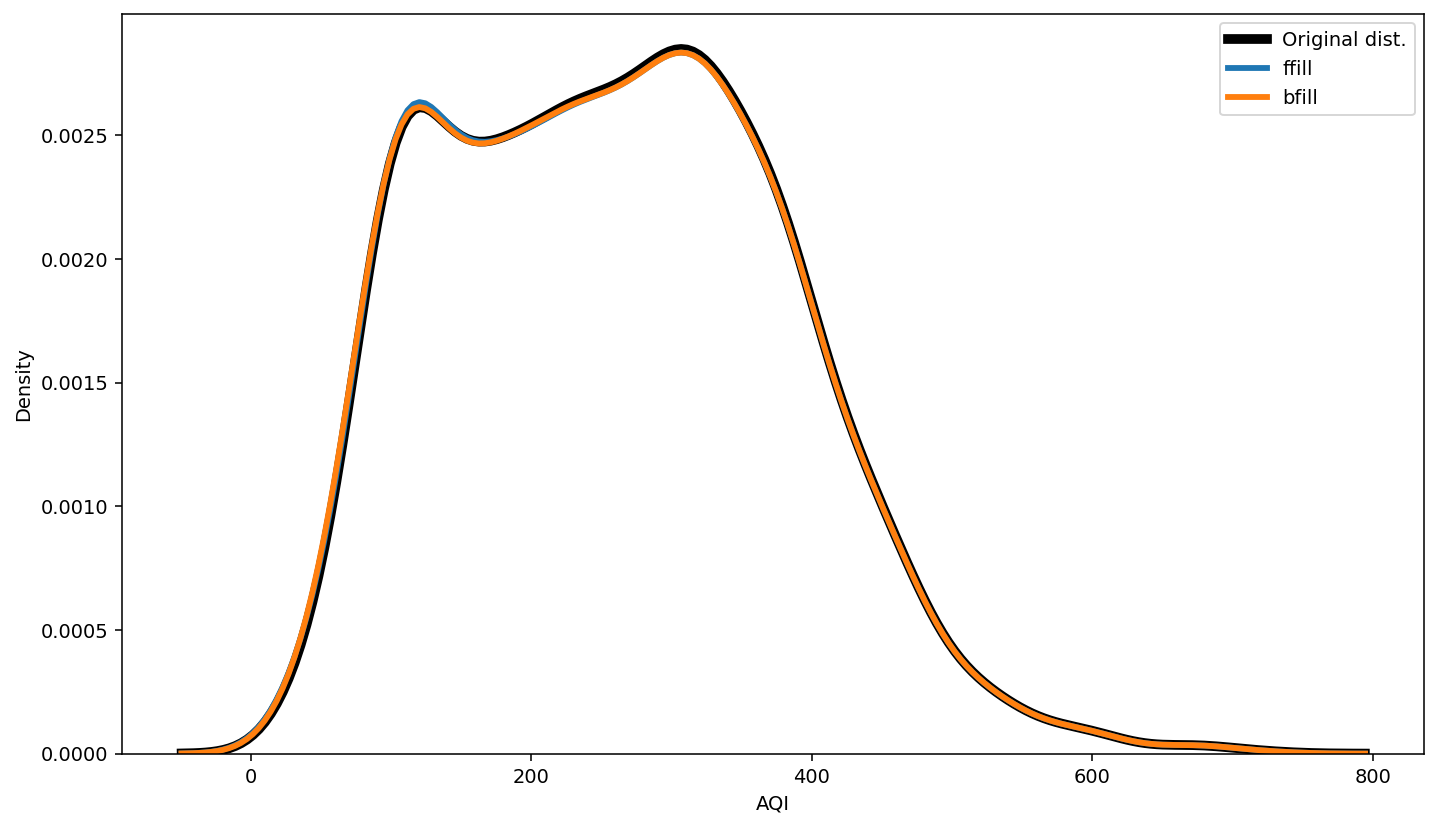

In [ ]:
clone2 = data_delhi.copy(deep=True)

for method in ["ffill", "bfill"]:
    clone2[method] = eval(f"clone2['AQI'].{method}()")

compare_dists(data_delhi["AQI"], {"ffill": clone2["ffill"], "bfill": clone2["bfill"]})

In [ ]:
data_delhi['AQI']=clone2['bfill']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_delhi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2009 entries, 2015-01-01 to 2020-07-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   2009 non-null   float64
 1   PM10    2009 non-null   float64
 2   NO      2009 non-null   float64
 3   NO2     2009 non-null   float64
 4   NOx     2009 non-null   float64
 5   NH3     2009 non-null   float64
 6   CO      2009 non-null   float64
 7   SO2     2009 non-null   float64
 8   O3      2009 non-null   float64
 9   AQI     2009 non-null   float64
dtypes: float64(10)
memory usage: 172.6 KB


In [ ]:
data_month_delhi=data_delhi.resample("M").mean()
data_month=data_bangalore.resample("M").mean()

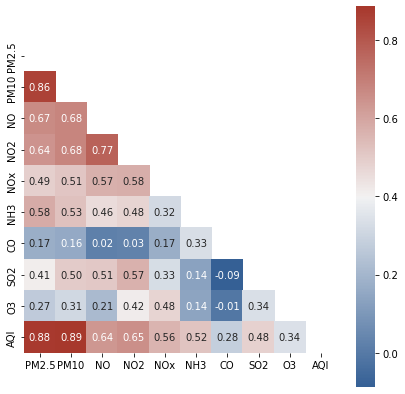

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = data_delhi.corr(method="pearson")  #print AQI
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.savefig(fname="delhi_corr.jpg", dpi=600)
plt.show();

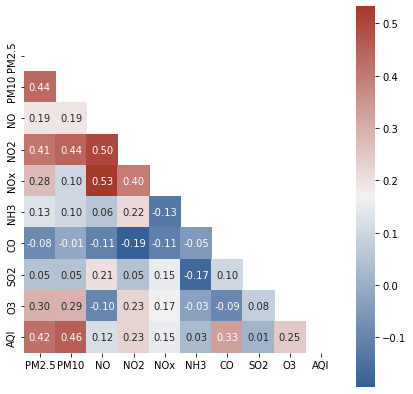

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = data_bangalore.corr(method="pearson")  #print AQI
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.savefig(fname="bang_corr.jpg", dpi=600)
plt.show();

#Splitting on Months

In [ ]:
data_bangalore["2015-03-01":"2015-06-30"]

PM2.5   PM10     NO    NO2  ...     CO    SO2     O3         AQI
Date                                    ...                                 
2015-03-01  30.26  76.68   2.52  10.39  ...   0.48   6.93  51.37   94.437306
2015-03-02  30.26  76.68   4.23  18.06  ...   3.56   6.72  58.97   94.437306
2015-03-03  30.26  76.68   7.81  19.56  ...  14.67   8.60  43.50   94.437306
2015-03-04  30.26  76.68   4.75  17.36  ...   3.39   5.99  61.80   94.437306
2015-03-05  30.26  76.68  11.53  19.94  ...  29.33   8.79  45.01   94.437306
...           ...    ...    ...    ...  ...    ...    ...    ...         ...
2015-06-26  14.52  76.68   1.14   6.10  ...   1.75   4.41  13.27   70.000000
2015-06-27  27.25  76.68   0.86   5.23  ...  15.98  10.62  15.20  165.000000
2015-06-28  20.99  76.68   0.72   4.38  ...   2.03   2.53  15.42  160.000000
2015-06-29  22.26  76.68   1.23   7.02  ...   5.28   7.62  10.29  209.000000
2015-06-30  23.51  76.68   2.75   8.39  ...   5.01   5.94   6.61  166.000000

[122 rows x 10 columns]

In [ ]:
data_bangalore["2016-03-01":"2016-06-30"]

PM2.5    PM10     NO    NO2  ...        CO   SO2     O3    AQI
Date                                      ...                              
2016-03-01   39.21  154.64  42.33  42.55  ...  0.840000  3.50  37.68  118.0
2016-03-02   42.17  134.78  19.36  33.44  ...  0.560000  2.24  31.99  132.0
2016-03-03   54.91  148.57   6.30  31.09  ...  0.580000  1.91  49.42  121.0
2016-03-04   54.04  137.04   9.52  38.09  ...  0.620000  2.45  42.21  136.0
2016-03-05   55.72  132.73   5.47  31.96  ...  1.680000  2.36  38.54  153.0
...            ...     ...    ...    ...  ...       ...   ...    ...    ...
2016-06-26   15.04   23.51   9.12  26.15  ...  1.838634  2.10  45.27   31.0
2016-06-27   16.54   48.92   9.12  26.15  ...  3.020000  2.10  45.27   33.0
2016-06-28   27.23   34.13   8.54  23.71  ...  3.630000  1.87  38.45  151.0
2016-06-29  115.98   17.10   8.59  24.19  ...  2.480000  1.58  39.09  174.0
2016-06-30   13.95   48.92   7.33  20.42  ...  3.550000  1.86  39.53  154.0

[122 rows x 10 columns]

In [ ]:
data_bangalore["2017-03-01":"2017-06-30"]

PM2.5    PM10     NO    NO2  NOx     NH3    CO   SO2     O3    AQI
Date                                                                          
2017-03-01  39.98   98.33  28.97  72.79  0.0  107.53  0.36  6.83  32.88   71.0
2017-03-02  36.36   85.55  14.27  51.16  0.0   24.18  0.38  6.54  22.95   75.0
2017-03-03  29.87   89.98   8.12  40.71  0.0   26.25  1.01  6.43  22.65  104.0
2017-03-04  28.41   75.22  11.64  41.35  0.0   26.53  0.53  8.16  13.85   57.0
2017-03-05  23.15   78.15   5.99  25.60  0.0   27.95  0.39  7.12  20.80   59.0
...           ...     ...    ...    ...  ...     ...   ...   ...    ...    ...
2017-06-26  31.13   96.37  12.54  37.52  0.0   31.96  1.16  7.96   8.44  138.0
2017-06-27  37.61  111.77  13.60  38.89  0.0   31.97  0.83  6.63   8.39   78.0
2017-06-28  37.34   97.49  10.09  34.73  0.0   32.02  0.60  6.63   8.99   82.0
2017-06-29  36.44   78.38  12.12  31.89  0.0   32.05  0.42  6.62   9.92   76.0
2017-06-30  35.40  107.39  15.16  33.89  0.0   31.99  0.69  6.63  10.32   76.0

[122 rows x 10 columns]

In [ ]:
data_bangalore["2018-03-01":"2018-06-30"]

PM2.5    PM10     NO    NO2    NOx    NH3    CO   SO2     O3   AQI
Date                                                                          
2018-03-01  29.48   99.47   4.80  27.41  20.33  18.55  0.95  3.09  36.47  83.0
2018-03-02  30.38  116.47   4.88  38.24  21.33  18.55  0.98  3.53  45.24  87.0
2018-03-03  38.39  121.49   6.26  36.26  26.83  18.55  1.00  3.14  43.82  92.0
2018-03-04  36.56  128.58   3.02  24.85  31.34  18.55  1.02  4.20  44.80  84.0
2018-03-05  30.79   94.71   7.78  34.44  39.95  18.55  1.02  3.71  36.83  86.0
...           ...     ...    ...    ...    ...    ...   ...   ...    ...   ...
2018-06-26  32.62   56.97   5.69  13.90  13.51  42.98  0.93  4.78  18.29  92.0
2018-06-27  11.68   42.25   4.95  15.17  12.58  42.71  1.02  4.87  16.43  60.0
2018-06-28   9.23   34.44   6.30  17.93  14.80  42.01  0.99  5.50  15.60  57.0
2018-06-29  11.93   44.86  10.26  17.94  17.54  37.54  0.99  5.95  17.84  51.0
2018-06-30  18.23   65.80  32.78  33.04  38.97  26.36  1.00  6.63  10.67  66.0

[122 rows x 10 columns]

In [ ]:
data_bangalore["2019-03-01":"2019-06-30"]

PM2.5    PM10     NO    NO2    NOx    NH3    CO   SO2     O3    AQI
Date                                                                           
2019-03-01  58.18  125.30  13.52  44.64  44.92  19.94  1.05  4.93  53.30  143.0
2019-03-02  40.93   95.38   6.74  26.91  26.08  17.74  0.83  4.57  49.67  107.0
2019-03-03  36.98   92.75   7.87  30.74  30.01  15.49  0.86  4.87  55.58  114.0
2019-03-04  43.15  100.96   5.02  29.23  26.24  15.83  0.80  5.09  63.42  123.0
2019-03-05  49.80  112.83  12.78  31.26  33.34  15.93  1.11  4.20  56.77  118.0
...           ...     ...    ...    ...    ...    ...   ...   ...    ...    ...
2019-06-26  34.69   61.12   7.53  21.39  24.94  13.32  0.76  4.15  25.30   74.0
2019-06-27  26.44   65.51   7.51  21.17  24.37  12.55  0.72  4.27  28.60   72.0
2019-06-28  26.98   85.13   7.01  21.09  23.98   7.99  0.68  4.78  33.50   72.0
2019-06-29  25.37   81.98   6.35  24.27  27.38   9.02  0.72  4.70  37.55   79.0
2019-06-30  20.16   63.53   5.14  17.51  19.15  10.04  0.63  3.91  33.55   68.0

[122 rows x 10 columns]

In [ ]:
data_bangalore["2020-03-01":"2020-06-30"]

PM2.5    PM10     NO    NO2    NOx    NH3    CO   SO2     O3    AQI
Date                                                                           
2020-03-01  56.20   89.66   3.51  21.91  21.37  14.37  0.98  7.09  49.93  101.0
2020-03-02  53.75  115.89   6.52  29.55  32.36  14.37  1.18  6.36  48.39  103.0
2020-03-03  70.78  154.34   8.97  32.33  35.82  14.47  1.27  6.96  61.01  137.0
2020-03-04  55.66  118.07  12.10  33.05  39.86  15.46  1.22  6.60  52.01  131.0
2020-03-05  57.89  111.38   6.09  28.68  30.95  14.39  1.04  7.21  53.06  117.0
...           ...     ...    ...    ...    ...    ...   ...   ...    ...    ...
2020-06-26  15.40   28.66   4.42  14.29  15.57   7.32  0.61  7.45  19.53   58.0
2020-06-27  16.60   29.48   3.06  13.68  13.07   6.88  0.67  7.29  15.69   51.0
2020-06-28  20.44   26.34   2.69  10.33  10.58   6.58  0.66  6.60  17.59   61.0
2020-06-29  28.68   29.27   3.62  12.12  12.94   6.80  0.56  6.33  16.99   65.0
2020-06-30  14.47   24.26   4.61  12.69  15.00   6.82  0.56  6.45  16.08   63.0

[122 rows x 10 columns]

In [ ]:
data_bangalore_summer=(data_bangalore["2015-03-01":"2015-06-30"])

In [ ]:
data_bangalore_monsoon=data_bangalore["2015-07-01":"2015-10-31"]

In [ ]:
data_bangalore_winter=data_bangalore["2015-11-01":"2016-02-29"]

In [ ]:
data_month

PM2.5       PM10         NO  ...        SO2         O3         AQI
Date                                         ...                                  
2015-01-31  30.260000  76.680000  13.241935  ...  17.240968  22.058387   94.437306
2015-02-28  30.260000  76.680000   8.996071  ...   7.397143  37.042857   94.437306
2015-03-31  36.612903  76.680000   7.197419  ...   8.776129  50.837742  107.249875
2015-04-30  28.666000  76.680000   3.894333  ...   8.305667  63.819667  113.733333
2015-05-31  33.549032  76.680000   5.837419  ...   5.268710  29.431613  102.774194
...               ...        ...        ...  ...        ...        ...         ...
2020-03-31  38.193226  79.966452   4.790968  ...   6.867097  44.945484   90.741935
2020-04-30  24.931667  46.863000   2.886667  ...   5.991000  40.517333   68.533333
2020-05-31  21.269677  59.758710   3.706774  ...   6.478065  32.435806   73.161290
2020-06-30  18.035333  41.063000   4.894000  ...   7.101667  16.244667   55.166667
2020-07-31  17.500000  30.480000   3.950000  ...   6.660000  15.400000   43.000000

[67 rows x 10 columns]

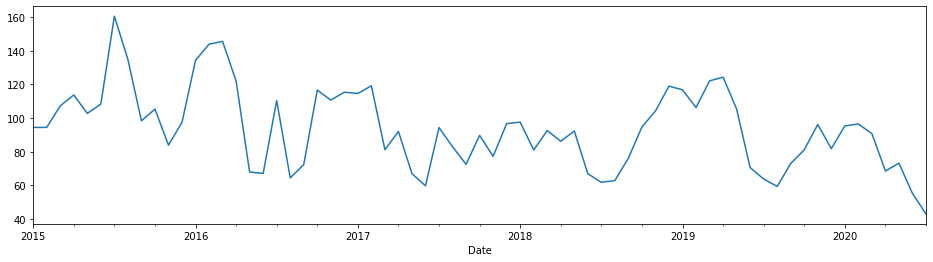

In [ ]:
data_month["AQI"].plot()

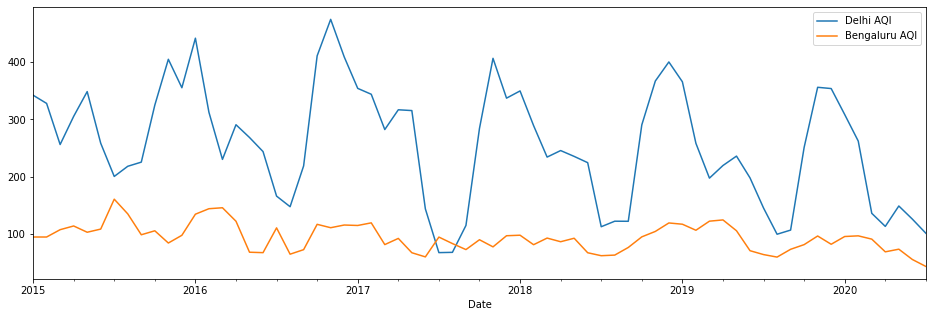

In [ ]:
data_month_delhi["AQI"].plot(figsize=(16, 5), label="Delhi AQI")
data_month["AQI"].plot(label="Bengaluru AQI")
plt.legend()
plt.savefig(fname="comp.jpg", dpi=600)

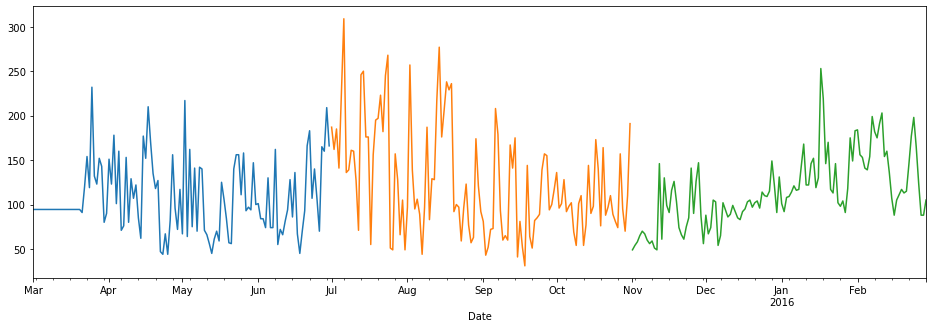

In [ ]:
data_bangalore_summer["AQI"].plot(figsize=(16, 5))
data_bangalore_monsoon["AQI"].plot()
data_bangalore_winter["AQI"].plot()

In [ ]:
data_bangalore_summer=data_bangalore_summer.append(data_bangalore["2016-03-01":"2016-06-30"])

In [ ]:
data_bangalore_summer=data_bangalore_summer.append(data_bangalore["2017-03-01":"2017-06-30"])

In [ ]:
data_bangalore_summer=data_bangalore_summer.append(data_bangalore["2018-03-01":"2018-06-30"])

In [ ]:
data_bangalore_summer=data_bangalore_summer.append(data_bangalore["2019-03-01":"2019-06-30"])

In [ ]:
data_bangalore_summer=data_bangalore_summer.append(data_bangalore["2020-03-01":"2020-06-30"])

In [ ]:
x=data_bangalore_summer.groupby([data_bangalore_summer.index.month, data_bangalore_summer.index.day]).mean()

In [ ]:
x.head(120)

PM2.5        PM10         NO  ...       SO2         O3         AQI
Date Date                                    ...                                 
3    1     42.218333  107.346667  15.941667  ...  5.395000  43.605000  101.739551
     2     38.975000  104.125000   9.333333  ...  4.993333  42.868333   99.739551
     3     43.531667  113.968333   7.555000  ...  5.318333  45.996667  110.406218
     4     41.346667  106.091667   7.675000  ...  5.415000  46.348333  104.239551
     5     41.268333  101.080000   8.273333  ...  5.565000  41.835000  104.572884
...              ...         ...        ...  ...       ...        ...         ...
6    24    19.401667   65.735000   7.371667  ...  4.898333  27.198333   95.500000
     25    25.486667   62.800000   8.061667  ...  5.093333  21.703333   70.666667
     26    23.900000   57.218333   6.740000  ...  5.141667  21.683333   77.166667
     27    22.686667   62.435000   6.516667  ...  5.963333  21.596667   76.500000
     28    23.701667   59.035000   5.891667  ...  4.651667  21.591667   97.166667

[120 rows x 10 columns]

In [ ]:
data_bangalore_summer

PM2.5   PM10     NO    NO2  ...     CO   SO2     O3        AQI
Date                                    ...                               
2015-03-01  30.26  76.68   2.52  10.39  ...   0.48  6.93  51.37  94.437306
2015-03-02  30.26  76.68   4.23  18.06  ...   3.56  6.72  58.97  94.437306
2015-03-03  30.26  76.68   7.81  19.56  ...  14.67  8.60  43.50  94.437306
2015-03-04  30.26  76.68   4.75  17.36  ...   3.39  5.99  61.80  94.437306
2015-03-05  30.26  76.68  11.53  19.94  ...  29.33  8.79  45.01  94.437306
...           ...    ...    ...    ...  ...    ...   ...    ...        ...
2020-06-26  15.40  28.66   4.42  14.29  ...   0.61  7.45  19.53  58.000000
2020-06-27  16.60  29.48   3.06  13.68  ...   0.67  7.29  15.69  51.000000
2020-06-28  20.44  26.34   2.69  10.33  ...   0.66  6.60  17.59  61.000000
2020-06-29  28.68  29.27   3.62  12.12  ...   0.56  6.33  16.99  65.000000
2020-06-30  14.47  24.26   4.61  12.69  ...   0.56  6.45  16.08  63.000000

[732 rows x 10 columns]

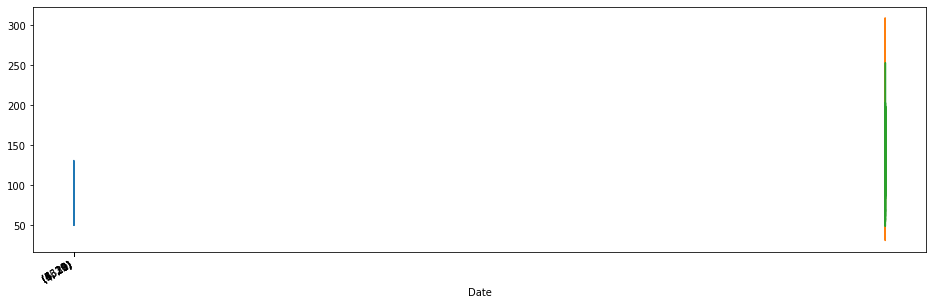

In [ ]:
x["AQI"].plot(figsize=(16, 5))
data_bangalore_monsoon["AQI"].plot()
data_bangalore_winter["AQI"].plot()

In [ ]:
data_bangalore_monsoon=data_bangalore_monsoon.append(data_bangalore["2016-07-01":"2016-10-31"])
data_bangalore_monsoon=data_bangalore_monsoon.append(data_bangalore["2017-07-01":"2017-10-31"])
data_bangalore_monsoon=data_bangalore_monsoon.append(data_bangalore["2018-07-01":"2018-10-31"])
data_bangalore_monsoon=data_bangalore_monsoon.append(data_bangalore["2019-07-01":"2019-10-31"])

In [ ]:
data_bangalore_monsoon

PM2.5   PM10     NO    NO2    NOx    NH3     CO   SO2     O3    AQI
Date                                                                           
2015-07-01  19.76  76.68   1.24   6.34   3.24   6.34   6.96  6.28   6.45  187.0
2015-07-02  20.24  76.68   2.26  11.59   6.83   6.42   2.58  5.12  11.01  162.0
2015-07-03  17.28  76.68   1.07   5.11   2.70   5.96   7.52  3.69   8.37  185.0
2015-07-04  21.52  76.68   1.00   5.99   2.90   5.76  15.90  2.76   9.72  141.0
2015-07-05  19.43  76.68   1.13   7.66   4.66   4.74  20.81  2.29   7.89  225.0
...           ...    ...    ...    ...    ...    ...    ...   ...    ...    ...
2019-10-27  42.44  74.17   7.74  21.32  23.05  12.84   1.01  5.26  20.17   74.0
2019-10-28  42.44  78.91  10.63  24.60  26.91  13.82   1.04  5.38  18.21   88.0
2019-10-29  34.24  78.00  11.34  22.99  27.53  16.13   0.97  6.61  20.89   80.0
2019-10-30  18.77  42.23  11.91  26.91  32.16  15.45   0.98  6.42  27.66   78.0
2019-10-31  18.62  49.95   7.39  24.47  26.76  14.41   0.87  5.73  35.18   68.0

[615 rows x 10 columns]

In [ ]:
data_bangalore_monsoon_avg=data_bangalore_monsoon.groupby([data_bangalore_monsoon.index.month, data_bangalore_monsoon.index.day]).mean()

In [ ]:
data_bangalore_monsoon_avg

PM2.5    PM10      NO     NO2  ...     CO    SO2      O3    AQI
Date Date                                  ...                             
7    1     23.226  75.154  12.320  21.480  ...  2.970  5.078  21.788  124.8
     2     23.838  62.840  18.908  28.728  ...  2.422  5.008  25.780  129.4
     3     20.068  64.852  16.884  26.590  ...  3.530  4.790  22.100  128.4
     4     20.842  80.538  11.740  19.740  ...  4.422  4.402  18.862  102.2
     5     20.974  70.710  10.468  19.068  ...  5.044  4.134  18.846  105.0
...           ...     ...     ...     ...  ...    ...    ...     ...    ...
10   27    42.130  97.668   9.796  36.450  ...  2.424  4.854  27.950  107.2
     28    43.192  93.482  11.662  36.042  ...  1.108  5.442  31.974   97.4
     29    45.146  97.572  13.748  37.044  ...  1.484  4.724  30.736  105.0
     30    39.390  88.240  13.304  34.266  ...  1.908  4.446  26.082  120.6
     31    48.748  79.298  10.214  31.680  ...  1.190  4.686  29.054  114.8

[123 rows x 10 columns]

In [ ]:
data_bangalore_winter=data_bangalore_winter.append(data_bangalore["2016-11-01":"2017-02-28"])
data_bangalore_winter=data_bangalore_winter.append(data_bangalore["2017-11-01":"2018-02-28"])
data_bangalore_winter=data_bangalore_winter.append(data_bangalore["2018-11-01":"2019-02-28"])
data_bangalore_winter=data_bangalore_winter.append(data_bangalore["2019-11-01":"2020-02-28"])

In [ ]:
data_bangalore_winter_avg=data_bangalore_winter.groupby([data_bangalore_winter.index.month, data_bangalore_winter.index.day]).mean()

In [ ]:
# data_bangalore_winter=data_bangalore["2015-11-01":"2016-02-28"]

In [ ]:
data_bangalore_winter

PM2.5   PM10    NO    NO2    NOx    NH3    CO   SO2     O3    AQI
Date                                                                         
2015-11-01  29.89  76.68  2.14  15.14   9.02  18.44  1.13  2.62  11.56   49.0
2015-11-02  28.56  76.68  6.90  18.20  14.16  23.29  1.36  2.51  12.65   54.0
2015-11-03  31.05  76.68  8.92  20.58  16.89  34.87  1.34  2.79  11.62   58.0
2015-11-04  43.10  76.68  4.09  12.07   8.88  27.02  3.56  2.44  19.13   65.0
2015-11-05  30.36  76.68  8.04  17.33  14.75  61.87  1.24  2.74  10.93   70.0
...           ...    ...   ...    ...    ...    ...   ...   ...    ...    ...
2020-02-24  35.60  82.42  5.07  25.61  28.15  11.92  1.01  5.93  43.59   82.0
2020-02-25  41.83  97.01  5.00  31.08  33.28  12.39  1.28  6.01  50.22  107.0
2020-02-26  47.39  88.67  5.03  27.21  30.32  12.47  0.97  5.38  36.49  104.0
2020-02-27  39.39  92.84  5.95  31.61  33.19  12.63  1.16  6.72  41.29  112.0
2020-02-28  42.58  95.58  5.36  26.77  29.54  12.35  1.06  6.75  46.40   98.0

[601 rows x 10 columns]

In [ ]:
# data_bangalore_winter["PM2.5"]=data_bangalore_winter["PM2.5"].values+data_bangalore["2016-11-01":"2017-02-28"]["PM2.5"].values

In [ ]:
data_bangalore_winter["PM2.5"]

Date
2015-11-01    29.89
2015-11-02    28.56
2015-11-03    31.05
2015-11-04    43.10
2015-11-05    30.36
              ...  
2020-02-24    35.60
2020-02-25    41.83
2020-02-26    47.39
2020-02-27    39.39
2020-02-28    42.58
Name: PM2.5, Length: 601, dtype: float64

In [ ]:
data_bangalore_winter_avg

PM2.5     PM10      NO     NO2  ...     CO    SO2      O3    AQI
Date Date                                   ...                             
1    1     41.370   90.758  10.964  40.360  ...  0.910  6.458  40.410   94.4
     2     36.294   86.618  12.842  44.702  ...  0.932  6.942  34.630   89.0
     3     39.274   88.298  13.458  49.958  ...  0.958  6.280  38.764   93.0
     4     46.086  103.172  13.012  47.824  ...  1.018  5.894  43.020   97.4
     5     45.952  102.014  12.262  47.756  ...  0.912  6.492  44.064  103.2
...           ...      ...     ...     ...  ...    ...    ...     ...    ...
12   27    60.830   93.880  10.008  38.232  ...  1.028  5.684  46.160  103.8
     28    58.112   85.968   9.864  36.054  ...  0.962  5.442  44.984  109.4
     29    46.174   88.094  11.344  38.088  ...  0.996  5.810  36.202   97.4
     30    48.330   91.340  11.444  40.850  ...  0.872  5.832  43.058   96.2
     31    47.324   90.816  13.214  43.544  ...  1.066  5.984  42.284  105.8

[121 rows x 10 columns]

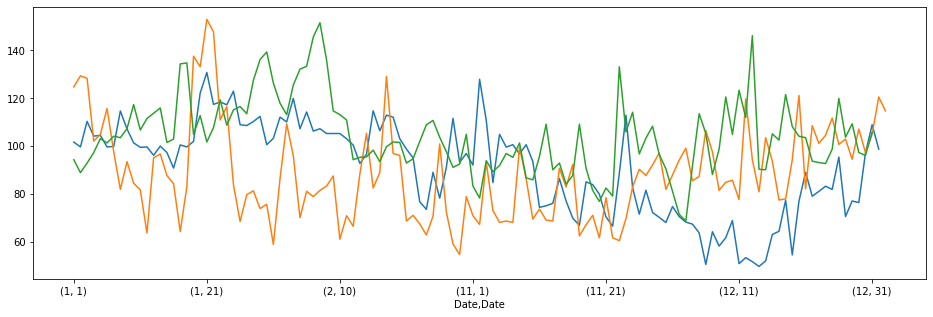

In [ ]:
x["AQI"].plot(figsize=(16, 5))
data_bangalore_monsoon_avg["AQI"].plot()
data_bangalore_winter_avg["AQI"].plot()

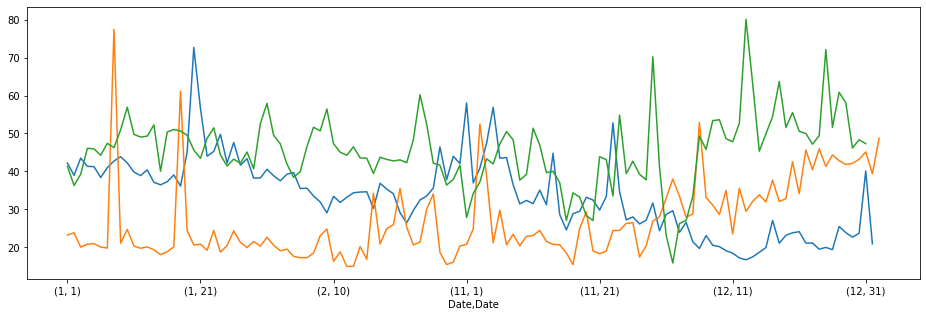

In [ ]:
x["PM2.5"].plot(figsize=(16, 5))
data_bangalore_monsoon_avg["PM2.5"].plot()
data_bangalore_winter_avg["PM2.5"].plot()

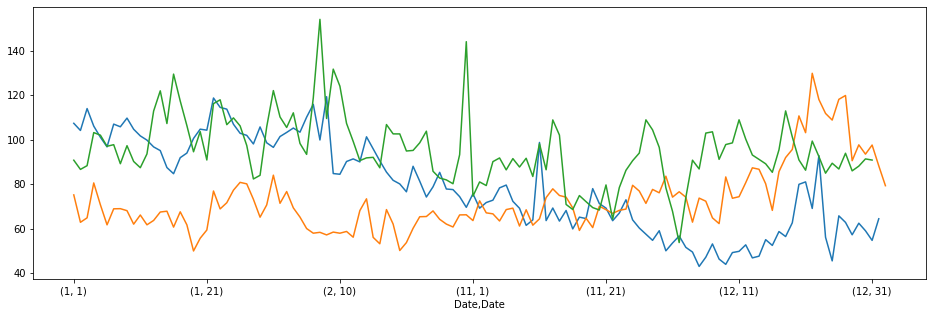

In [ ]:
x["PM10"].plot(figsize=(16, 5))
data_bangalore_monsoon_avg["PM10"].plot()
data_bangalore_winter_avg["PM10"].plot()

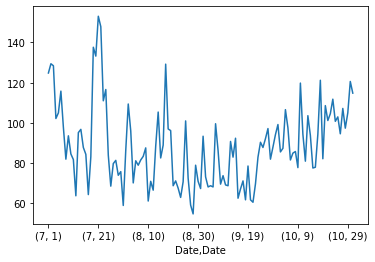

In [ ]:
data_bangalore_monsoon_avg["AQI"].plot()


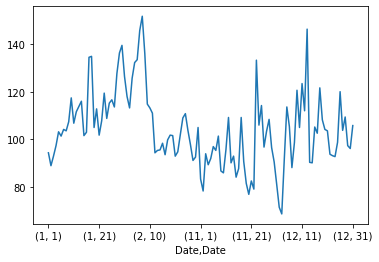

In [ ]:
data_bangalore_winter_avg["AQI"].plot()

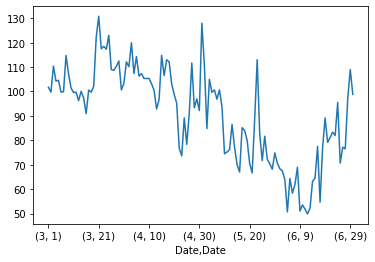

In [ ]:
x["AQI"].plot()

In [ ]:
winter_copy=data_bangalore_winter_avg[["PM2.5",	"PM10",	"NO",	"NO2",	"NOx",	"NH3", "CO",	"SO2",	"O3",	"AQI"]]

In [ ]:
winter_copy

PM2.5     PM10      NO     NO2  ...     CO    SO2      O3    AQI
Date Date                                   ...                             
1    1     41.370   90.758  10.964  40.360  ...  0.910  6.458  40.410   94.4
     2     36.294   86.618  12.842  44.702  ...  0.932  6.942  34.630   89.0
     3     39.274   88.298  13.458  49.958  ...  0.958  6.280  38.764   93.0
     4     46.086  103.172  13.012  47.824  ...  1.018  5.894  43.020   97.4
     5     45.952  102.014  12.262  47.756  ...  0.912  6.492  44.064  103.2
...           ...      ...     ...     ...  ...    ...    ...     ...    ...
12   27    60.830   93.880  10.008  38.232  ...  1.028  5.684  46.160  103.8
     28    58.112   85.968   9.864  36.054  ...  0.962  5.442  44.984  109.4
     29    46.174   88.094  11.344  38.088  ...  0.996  5.810  36.202   97.4
     30    48.330   91.340  11.444  40.850  ...  0.872  5.832  43.058   96.2
     31    47.324   90.816  13.214  43.544  ...  1.066  5.984  42.284  105.8

[121 rows x 10 columns]

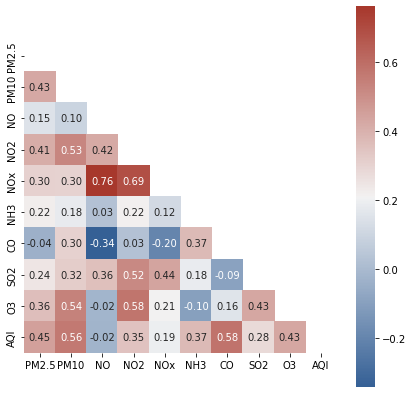

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = data_bangalore_winter_avg.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

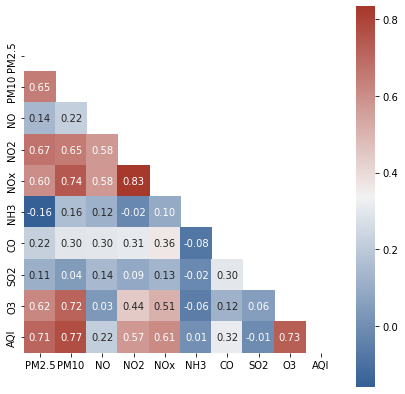

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = x.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

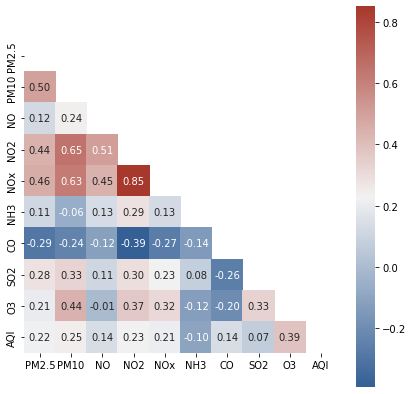

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = data_bangalore_monsoon_avg.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

In [ ]:
data_bangalore_monsoon

PM2.5   PM10     NO    NO2    NOx    NH3     CO   SO2     O3    AQI
Date                                                                           
2015-07-01  19.76  76.68   1.24   6.34   3.24   6.34   6.96  6.28   6.45  187.0
2015-07-02  20.24  76.68   2.26  11.59   6.83   6.42   2.58  5.12  11.01  162.0
2015-07-03  17.28  76.68   1.07   5.11   2.70   5.96   7.52  3.69   8.37  185.0
2015-07-04  21.52  76.68   1.00   5.99   2.90   5.76  15.90  2.76   9.72  141.0
2015-07-05  19.43  76.68   1.13   7.66   4.66   4.74  20.81  2.29   7.89  225.0
...           ...    ...    ...    ...    ...    ...    ...   ...    ...    ...
2019-10-27  42.44  74.17   7.74  21.32  23.05  12.84   1.01  5.26  20.17   74.0
2019-10-28  42.44  78.91  10.63  24.60  26.91  13.82   1.04  5.38  18.21   88.0
2019-10-29  34.24  78.00  11.34  22.99  27.53  16.13   0.97  6.61  20.89   80.0
2019-10-30  18.77  42.23  11.91  26.91  32.16  15.45   0.98  6.42  27.66   78.0
2019-10-31  18.62  49.95   7.39  24.47  26.76  14.41   0.87  5.73  35.18   68.0

[615 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


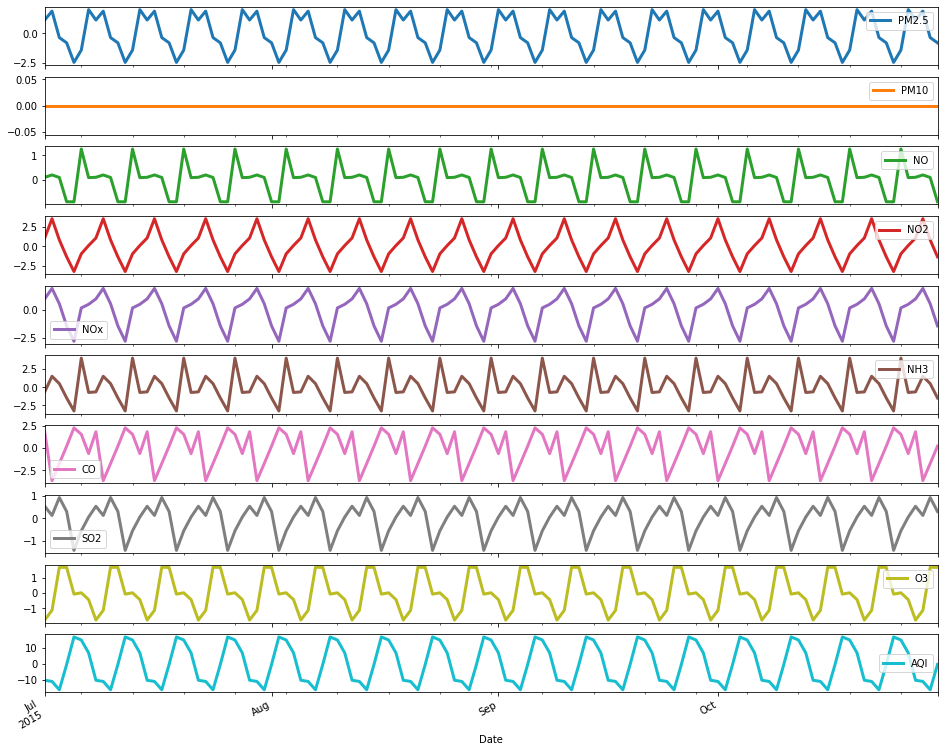

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

seasonality_dict = {}

for ts in data_bangalore_monsoon.columns:
    decompositions = sm.tsa.seasonal_decompose(data_bangalore_monsoon["2015"][ts].dropna())
    # Store the results back
    seasonality_dict[ts] = decompositions.seasonal

# Plot
rcParams["figure.figsize"] = 16, 14
pd.DataFrame(seasonality_dict).plot(
    subplots=True, layout=(10, 1), linewidth=3
);

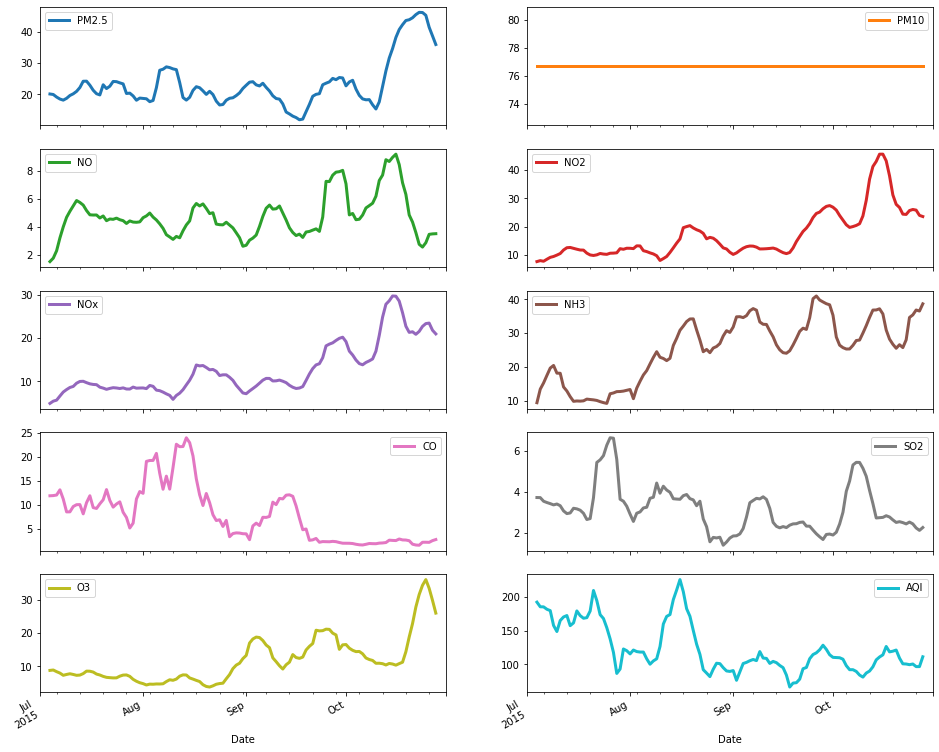

In [ ]:
trend_dict1 = {}

for ts in data_bangalore_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_monsoon["2015"][ts].dropna())
    # Store back the results
    trend_dict1[ts] = decomposition.trend

pd.DataFrame(trend_dict1).plot(subplots=True, layout=(5, 2), linewidth=3);

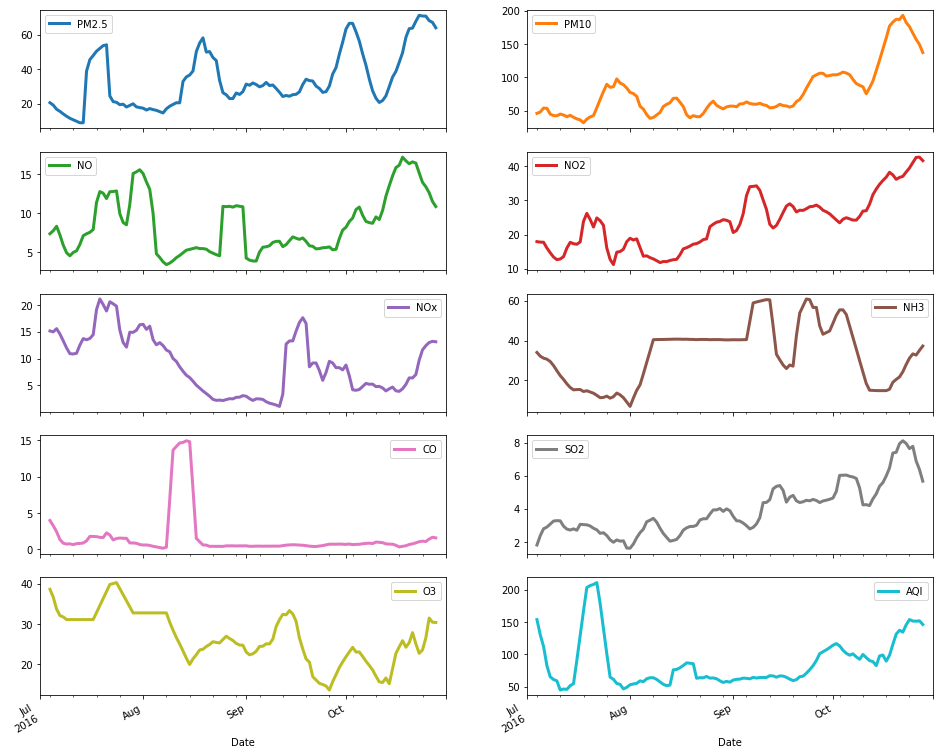

In [ ]:
trend_dict2={}

for ts in data_bangalore_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_monsoon["2016"][ts].dropna())
    # Store back the results
    trend_dict2[ts] = decomposition.trend

pd.DataFrame(trend_dict2).plot(subplots=True, layout=(5, 2), linewidth=3);

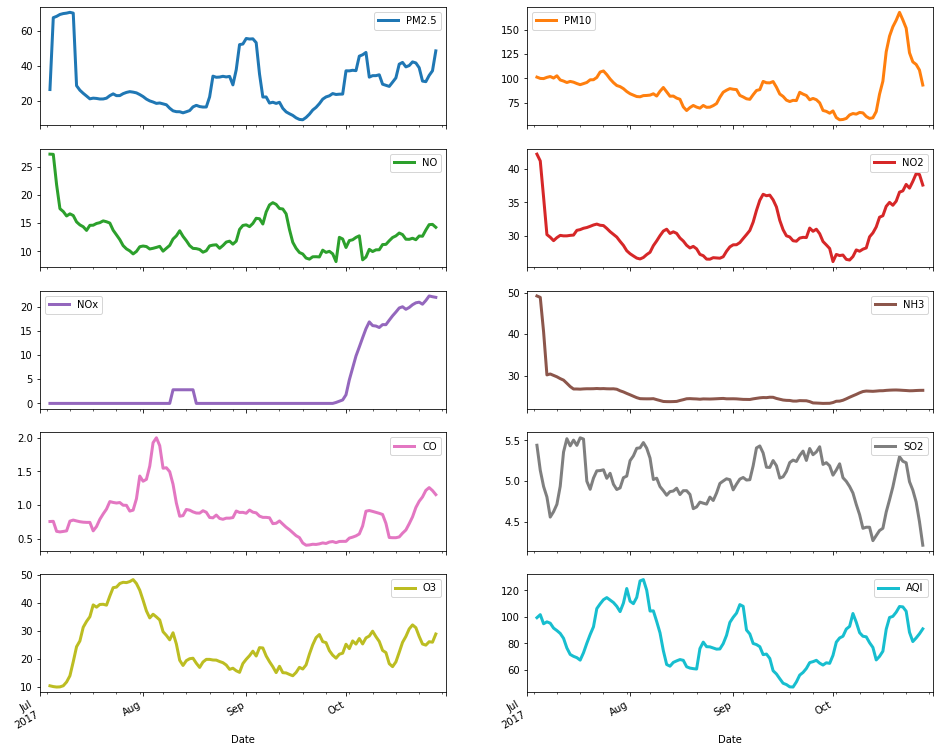

In [ ]:
trend_dict3={}
for ts in data_bangalore_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_monsoon["2017"][ts].dropna())
    # Store back the results
    trend_dict3[ts] = decomposition.trend

pd.DataFrame(trend_dict3).plot(subplots=True, layout=(5, 2), linewidth=3);

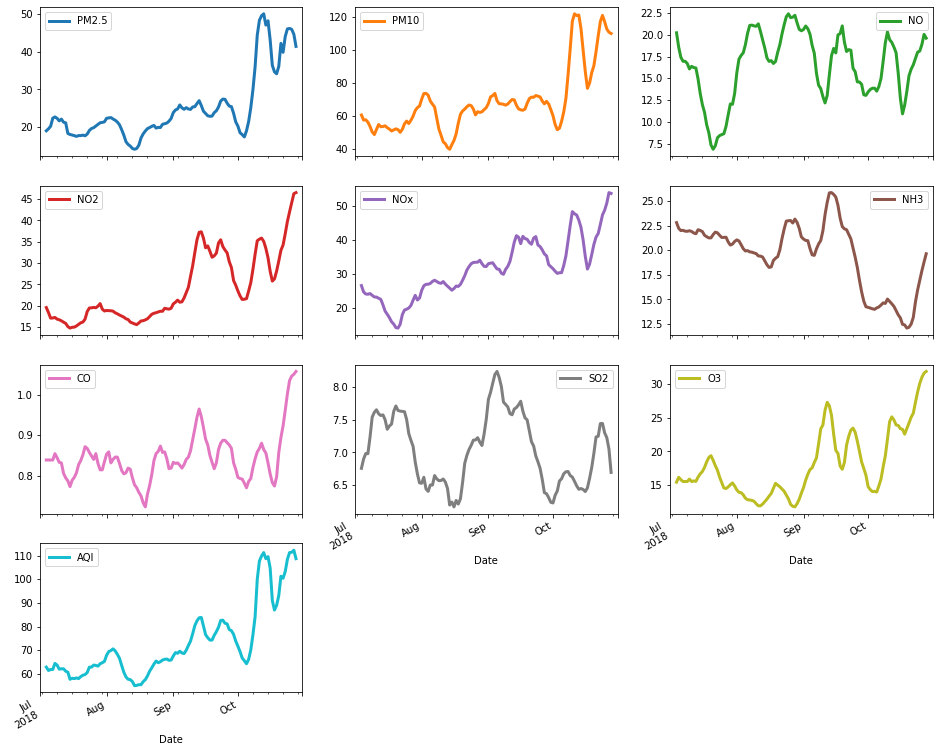

In [ ]:
trend_dict4={}
for ts in data_bangalore_monsoon.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_monsoon["2018"][ts].dropna())
    # Store back the results
    trend_dict4[ts] = decomposition.trend

pd.DataFrame(trend_dict4).plot(subplots=True, layout=(4, 3), linewidth=3);

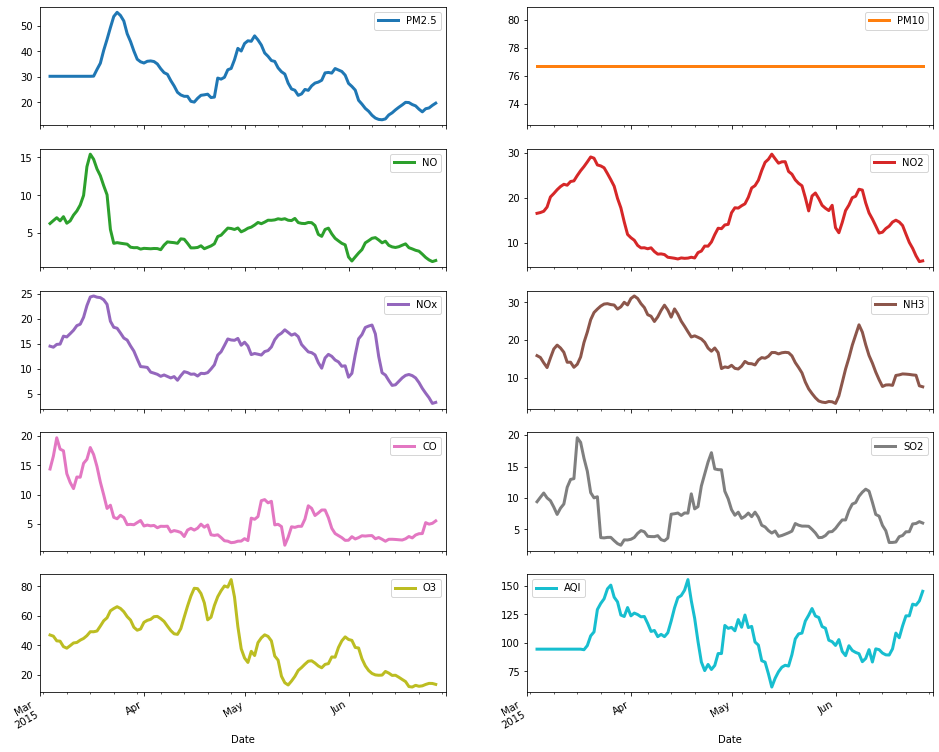

In [ ]:
trend_dict1={}
for ts in data_bangalore_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_summer["2015"][ts].dropna())
    # Store back the results
    trend_dict1[ts] = decomposition.trend

pd.DataFrame(trend_dict1).plot(subplots=True, layout=(5, 2), linewidth=3);

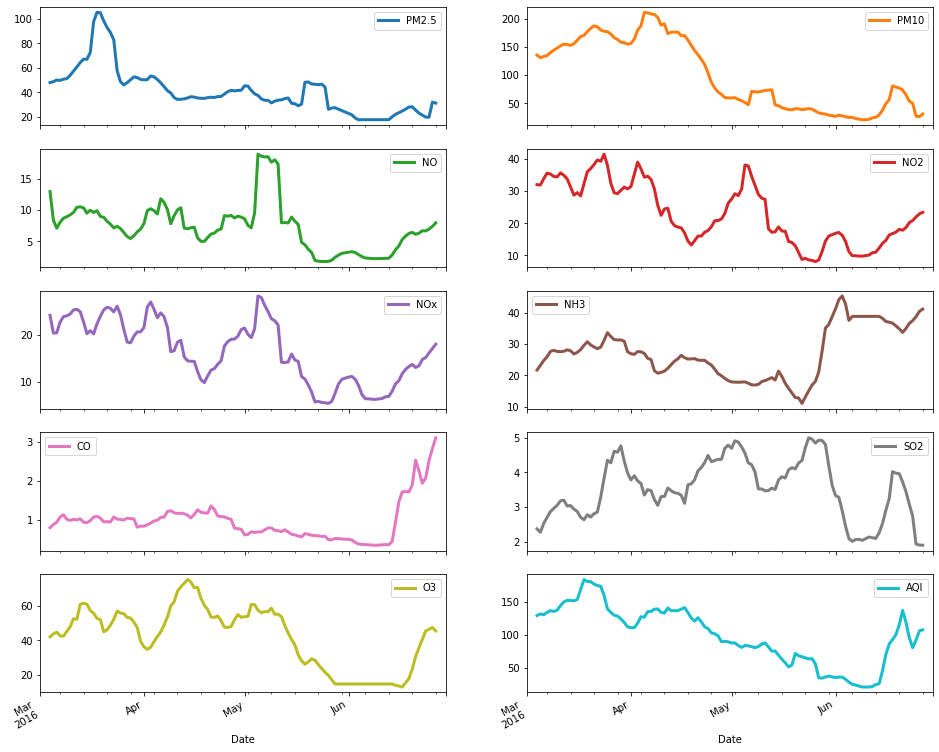

In [ ]:
trend_dict2={}
for ts in data_bangalore_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_summer["2016"][ts].dropna())
    # Store back the results
    trend_dict2[ts] = decomposition.trend

pd.DataFrame(trend_dict2).plot(subplots=True, layout=(5, 2), linewidth=3);

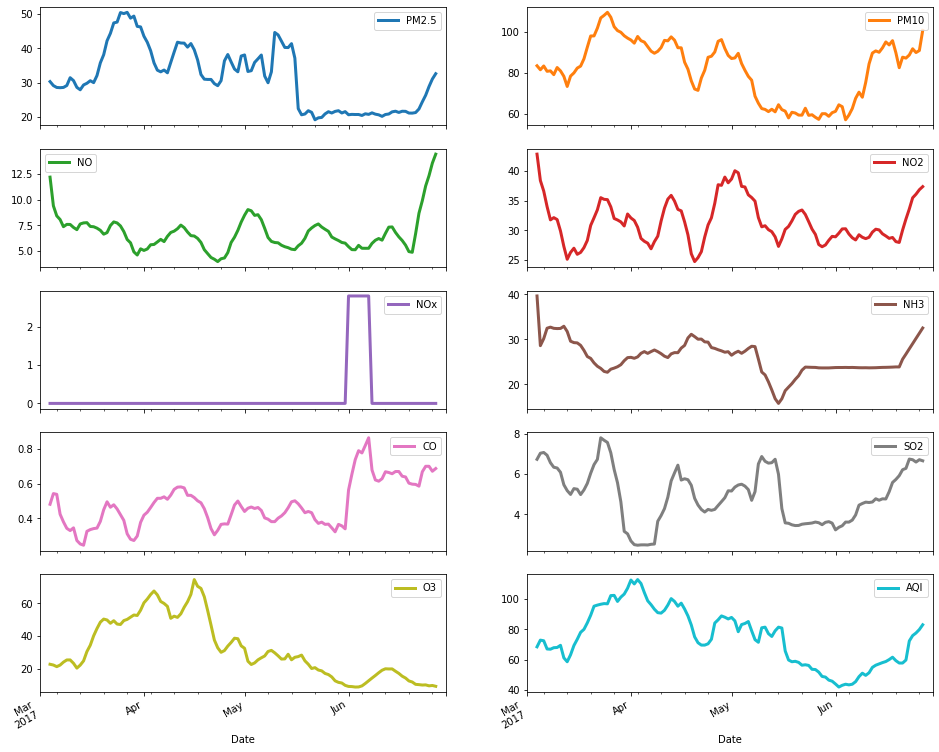

In [ ]:
trend_dict3={}
for ts in data_bangalore_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_summer["2017"][ts].dropna())
    # Store back the results
    trend_dict3[ts] = decomposition.trend

pd.DataFrame(trend_dict3).plot(subplots=True, layout=(5, 2), linewidth=3);

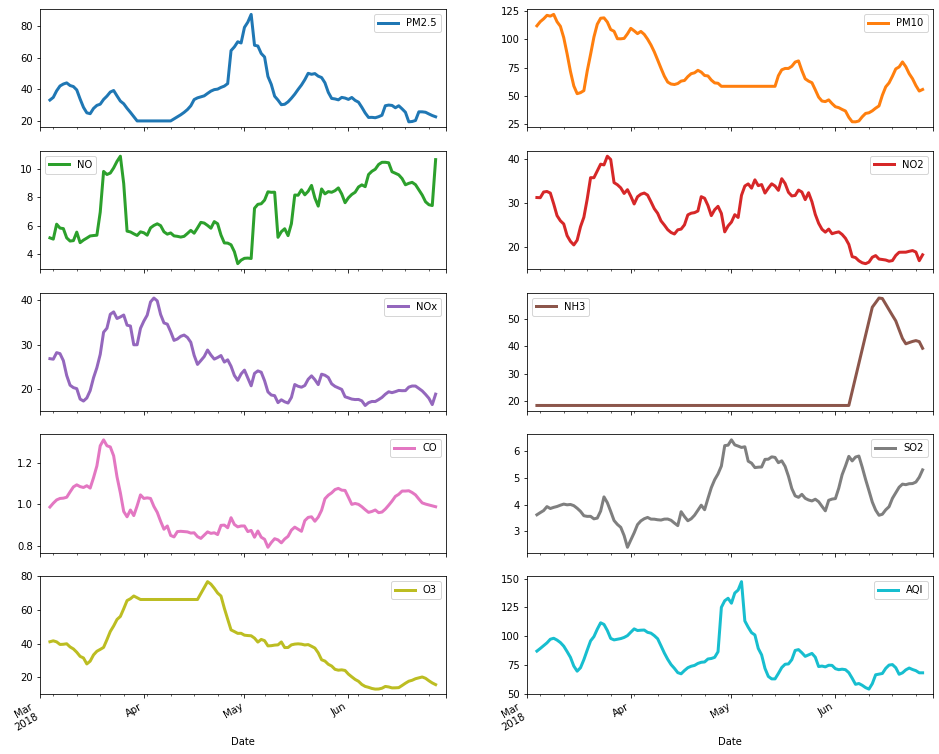

In [ ]:
trend_dict4={}
for ts in data_bangalore_summer.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_summer["2018"][ts].dropna())
    # Store back the results
    trend_dict4[ts] = decomposition.trend

pd.DataFrame(trend_dict4).plot(subplots=True, layout=(5, 2), linewidth=3);

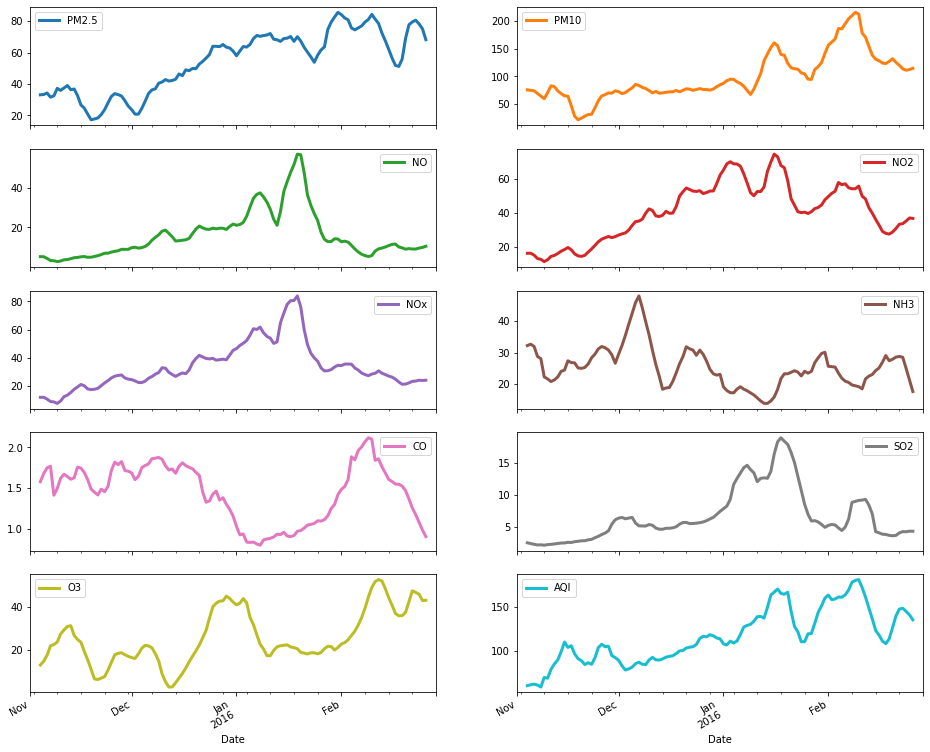

In [ ]:
trend_dict = {}

for ts in data_bangalore_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_winter["2015-11-01":"2016-02-29"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

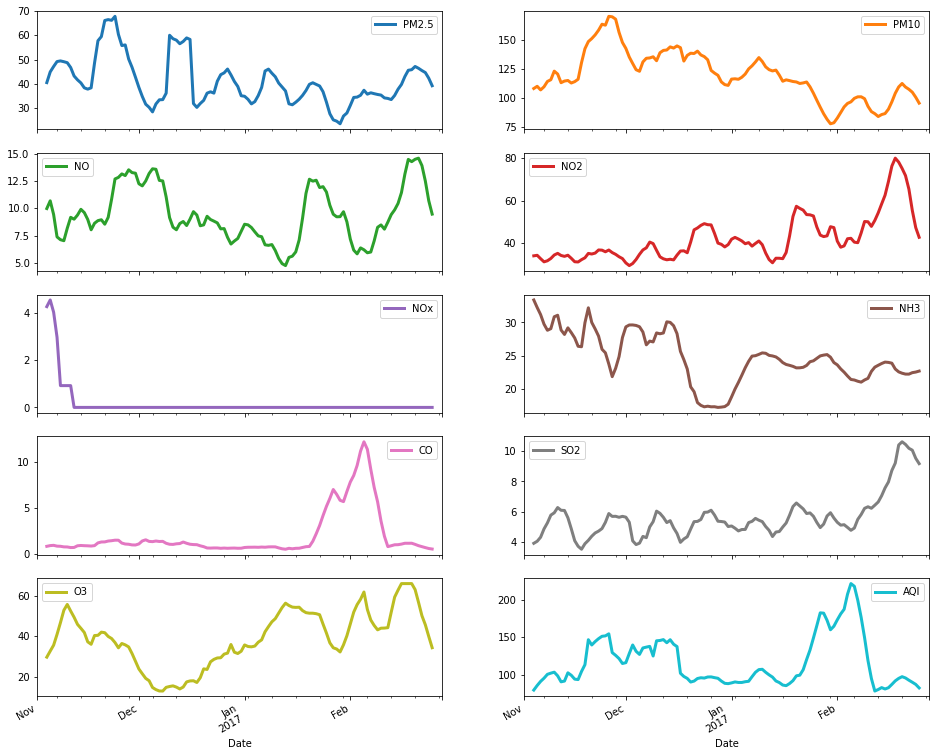

In [ ]:
trend_dict = {}

for ts in data_bangalore_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_winter["2016-11-01":"2017-02-28"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

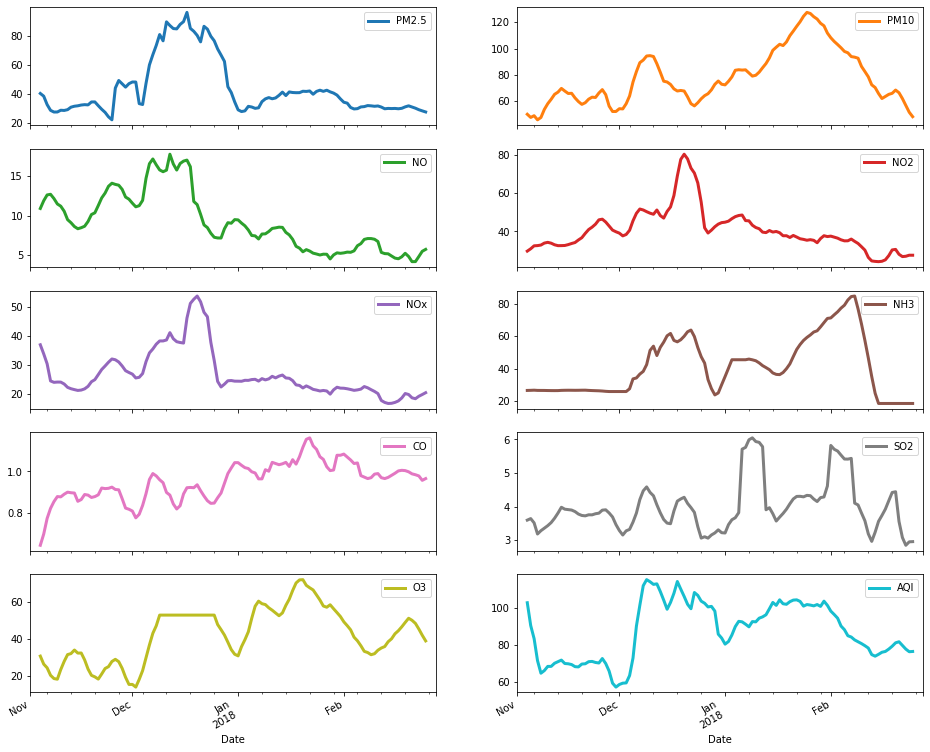

In [ ]:
trend_dict = {}

for ts in data_bangalore_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_winter["2017-11-01":"2018-02-28"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

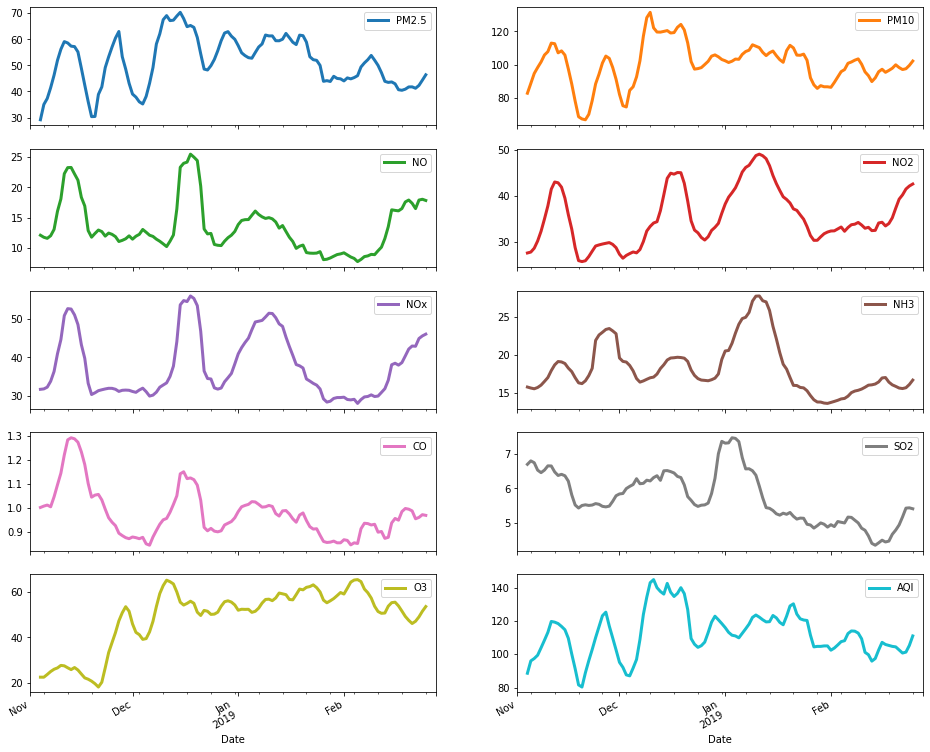

In [ ]:
trend_dict = {}

for ts in data_bangalore_winter.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore_winter["2018-11-01":"2019-02-28"][ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

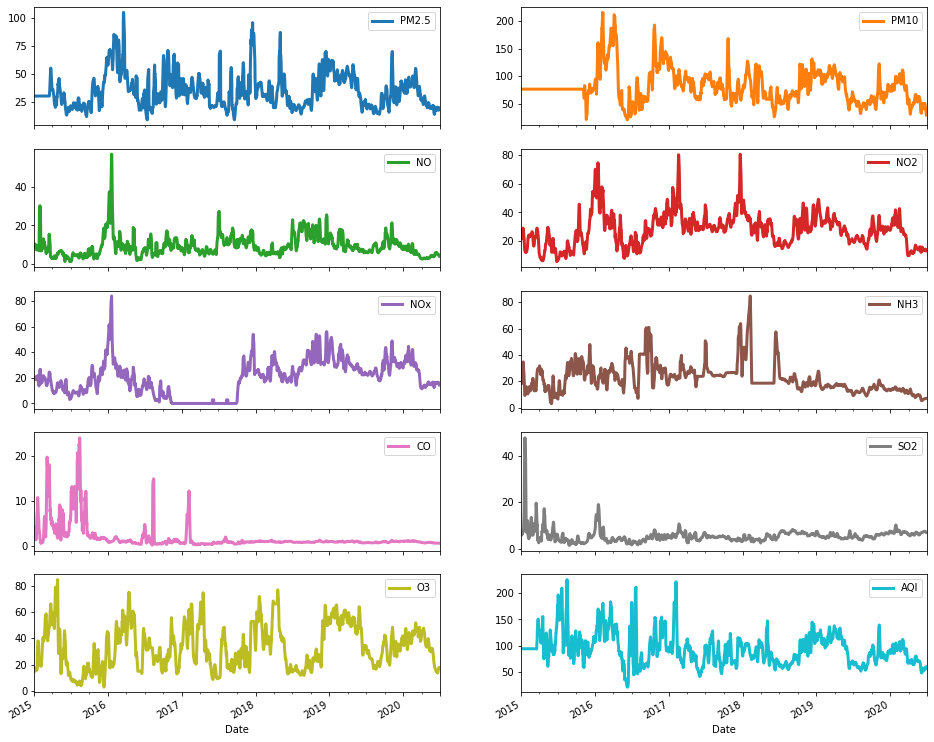

In [ ]:
trend_dict = {}

for ts in data_bangalore.columns:
    decomposition = sm.tsa.seasonal_decompose(data_bangalore[ts].dropna())
    # Store back the results
    trend_dict[ts] = decomposition.trend

pd.DataFrame(trend_dict).plot(subplots=True, layout=(5, 2), linewidth=3);

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


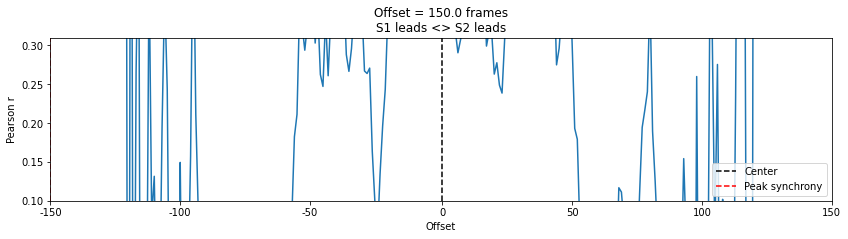

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = data_bangalore_monsoon["2018"]['PM2.5']
d2 = data_bangalore_monsoon["2018"]['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In [ ]:
!pip install dtw

  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5315 sha256=e7d42058b411b6fe00d04dc1e8f6f3d512f75b7aa85f49536fd19fac7d2c9bd2
  Stored in directory: /root/.cache/pip/wheels/f9/51/54/b7f446e6d4f5be9a66066b59c5030731191260515737be4496
Successfully built dtw


In [ ]:
# # Windowed time lagged cross correlation
# seconds = 5
# fps = 30
# no_splits = 20
# samples_per_split = df.shape[0]/no_splits
# rss=[]
# for t in range(0, no_splits):
#     d1 = df['S1_Jo'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
#     d2 = df['S2_Joy'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
#     rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
# rss = pd.DataFrame(rss)
# f,ax = plt.subplots(figsize=(10,5))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# # Rolling window time lagged cross correlation
# seconds = 5
# fps = 30
# window_size = 300 #samples
# t_start = 0
# t_end = t_start + window_size
# step_size = 30
# rss=[]
# while t_end < 5400:
#     d1 = df['S1_Joy'].iloc[t_start:t_end]
#     d2 = df['S2_Joy'].iloc[t_start:t_end]
#     rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
#     rss.append(rs)
#     t_start = t_start + step_size
#     t_end = t_end + step_size
# rss = pd.DataFrame(rss)

# f,ax = plt.subplots(figsize=(10,10))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

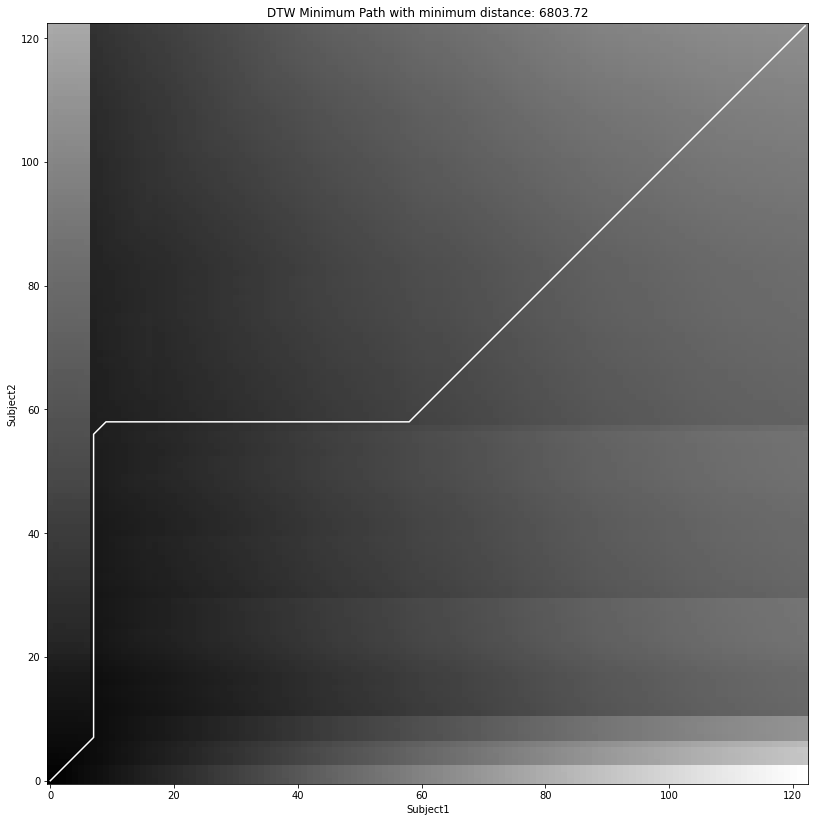

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_bangalore_monsoon_avg['PM2.5'].interpolate().values
d2 = data_bangalore_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

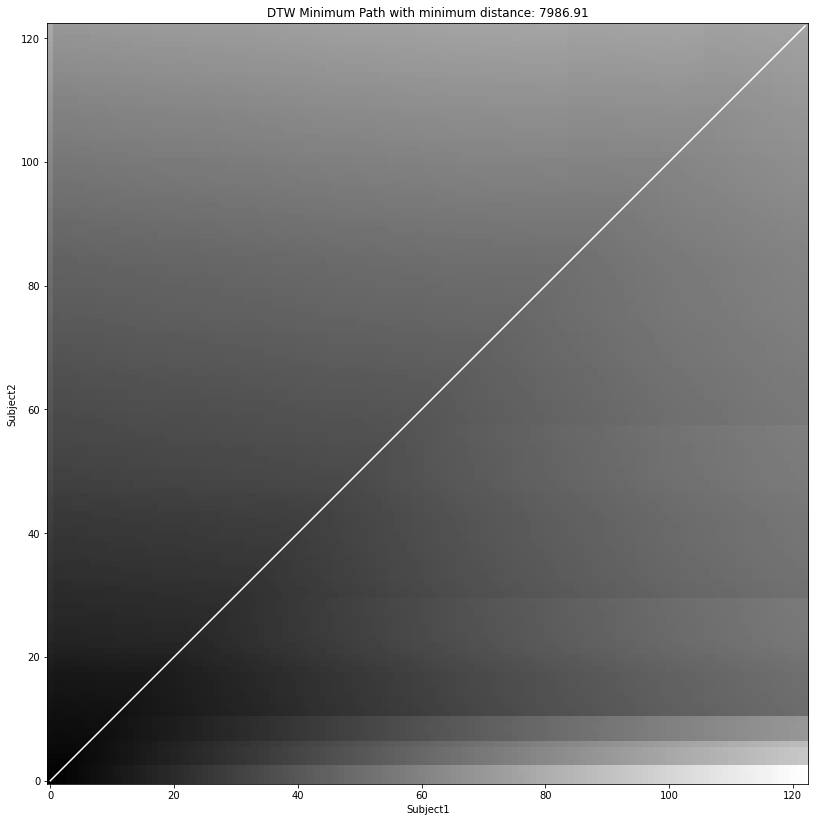

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_bangalore_monsoon_avg['NO2'].interpolate().values
d2 = data_bangalore_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

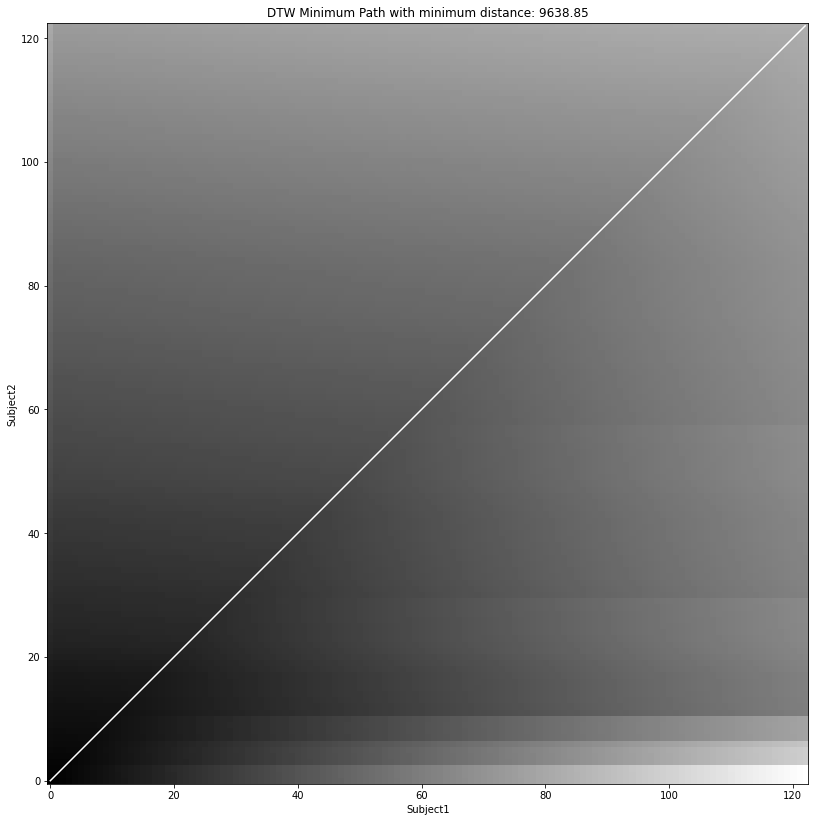

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_bangalore_monsoon_avg['NO'].interpolate().values
d2 = data_bangalore_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

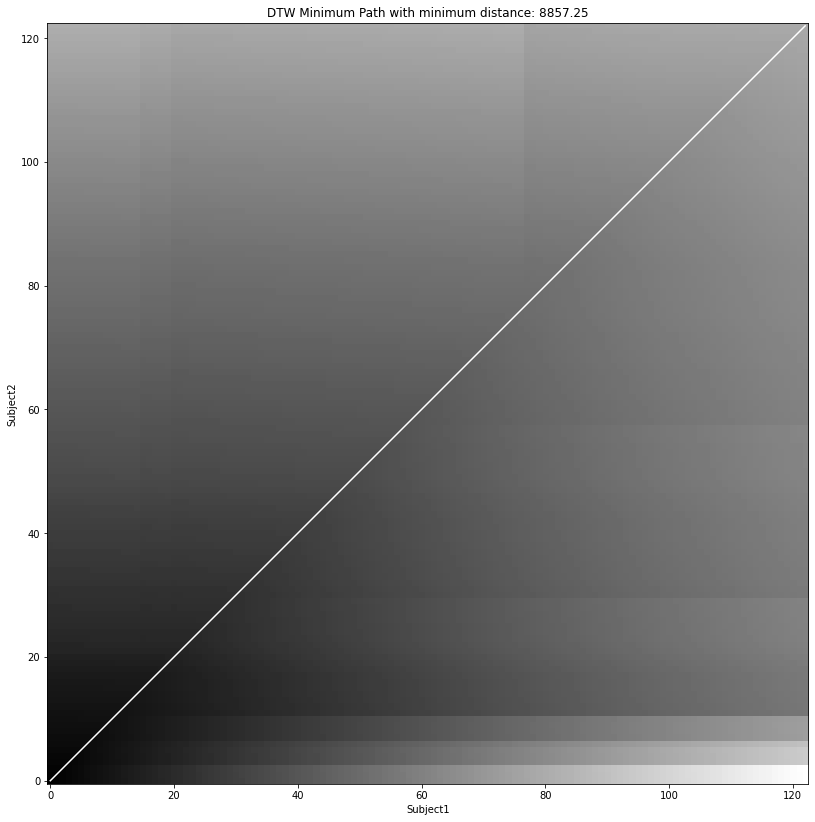

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_bangalore_monsoon_avg['NOx'].interpolate().values
d2 = data_bangalore_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

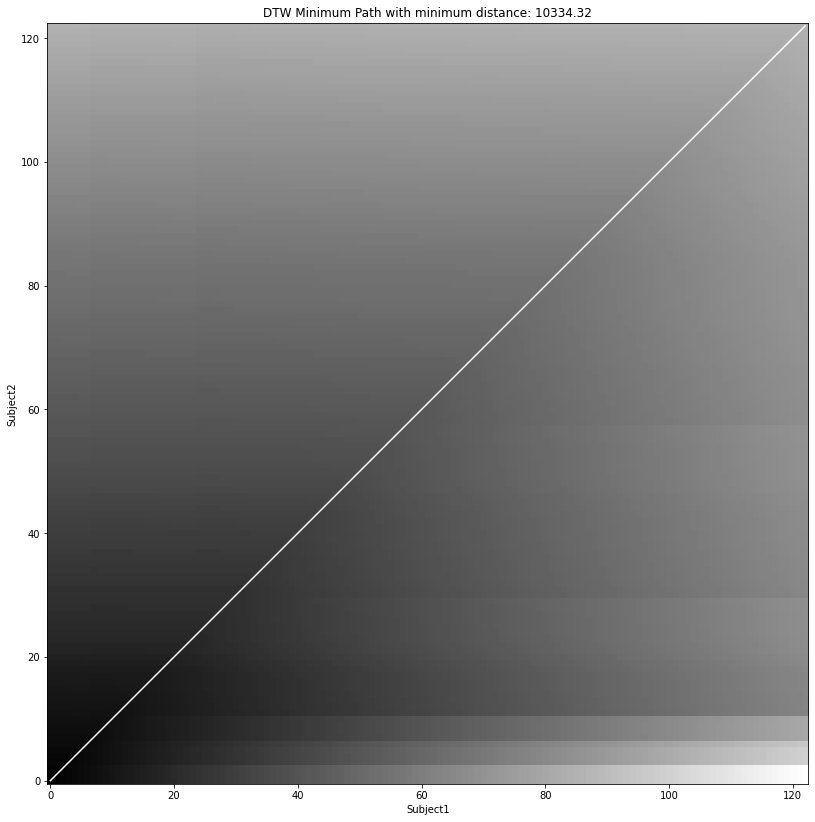

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = data_bangalore_monsoon_avg['SO2'].interpolate().values
d2 = data_bangalore_monsoon_avg['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

In [ ]:
bl_bangalore=data_bangalore[:"2020-03-24"]
al_bangalore=data_bangalore["2020-03-25":]

In [ ]:
bl_bangalore

PM2.5   PM10     NO    NO2  ...     CO    SO2     O3         AQI
Date                                    ...                                 
2015-01-01  30.26  76.68   3.26  17.33  ...   0.33   3.54  10.73   94.437306
2015-01-02  30.26  76.68   6.05  19.73  ...   1.35   3.97  22.77   94.437306
2015-01-03  30.26  76.68  11.91  19.88  ...  17.40  13.61  12.03   94.437306
2015-01-04  30.26  76.68   7.45  21.61  ...   5.05   6.52  17.70   94.437306
2015-01-05  30.26  76.68   9.52  22.17  ...   1.83   4.71  12.72   94.437306
...           ...    ...    ...    ...  ...    ...    ...    ...         ...
2020-03-20  43.31  94.45   3.79  23.38  ...   0.98   6.97  53.12  100.000000
2020-03-21  40.62  95.67   6.20  31.05  ...   1.06   6.75  59.91  103.000000
2020-03-22  30.16  66.88   4.20  13.39  ...   0.82   6.92  48.99   99.000000
2020-03-23  40.28  82.77   4.01  20.12  ...   1.05   6.03  42.02   85.000000
2020-03-24  50.85  82.89   3.45  15.65  ...   0.86   6.39  39.76  106.000000

[1910 rows x 10 columns]

In [ ]:
al_bangalore

PM2.5   PM10    NO    NO2    NOx    NH3    CO   SO2     O3   AQI
Date                                                                        
2020-03-25  25.25  48.81  2.62   9.73  11.41  11.91  0.76  7.92  38.24  70.0
2020-03-26  27.77  51.53  2.55   8.99  10.63  11.25  0.70  5.87  35.05  61.0
2020-03-27  27.47  51.79  3.22   9.44  11.22  11.09  0.85  6.49  35.60  67.0
2020-03-28  24.89  45.75  2.63  10.58  12.06  10.13  0.85  6.11  36.29  70.0
2020-03-29  28.45  47.23  2.99  12.22  14.05  10.41  0.85  6.37  37.19  66.0
...           ...    ...   ...    ...    ...    ...   ...   ...    ...   ...
2020-06-27  16.60  29.48  3.06  13.68  13.07   6.88  0.67  7.29  15.69  51.0
2020-06-28  20.44  26.34  2.69  10.33  10.58   6.58  0.66  6.60  17.59  61.0
2020-06-29  28.68  29.27  3.62  12.12  12.94   6.80  0.56  6.33  16.99  65.0
2020-06-30  14.47  24.26  4.61  12.69  15.00   6.82  0.56  6.45  16.08  63.0
2020-07-01  17.50  30.48  3.95  13.25  14.83   7.42  0.54  6.66  15.40  43.0

[99 rows x 10 columns]

In [ ]:
shift_al_bangalore=al_bangalore.copy()
shift_al_bangalore["shifted_1"] = shift_al_bangalore["AQI"].shift(periods=1)

In [ ]:
shift_al_bangalore["diff_lag"] = shift_al_bangalore["AQI"] - shift_al_bangalore["shifted_1"]

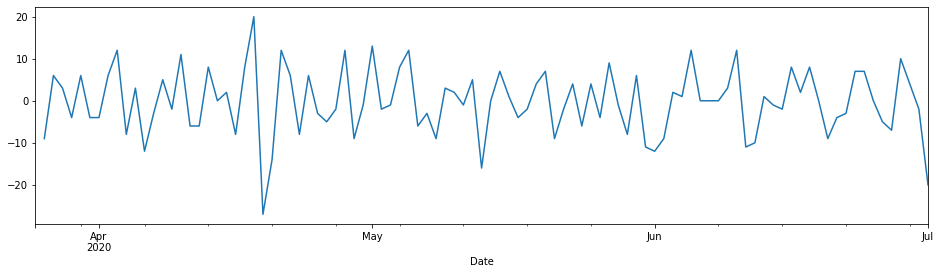

In [ ]:
shift_al_bangalore["diff_lag"].plot(figsize=(16, 4));

In [ ]:
al_bangalore

PM2.5   PM10    NO    NO2    NOx    NH3    CO   SO2     O3   AQI
Date                                                                        
2020-03-25  25.25  48.81  2.62   9.73  11.41  11.91  0.76  7.92  38.24  70.0
2020-03-26  27.77  51.53  2.55   8.99  10.63  11.25  0.70  5.87  35.05  61.0
2020-03-27  27.47  51.79  3.22   9.44  11.22  11.09  0.85  6.49  35.60  67.0
2020-03-28  24.89  45.75  2.63  10.58  12.06  10.13  0.85  6.11  36.29  70.0
2020-03-29  28.45  47.23  2.99  12.22  14.05  10.41  0.85  6.37  37.19  66.0
...           ...    ...   ...    ...    ...    ...   ...   ...    ...   ...
2020-06-27  16.60  29.48  3.06  13.68  13.07   6.88  0.67  7.29  15.69  51.0
2020-06-28  20.44  26.34  2.69  10.33  10.58   6.58  0.66  6.60  17.59  61.0
2020-06-29  28.68  29.27  3.62  12.12  12.94   6.80  0.56  6.33  16.99  65.0
2020-06-30  14.47  24.26  4.61  12.69  15.00   6.82  0.56  6.45  16.08  63.0
2020-07-01  17.50  30.48  3.95  13.25  14.83   7.42  0.54  6.66  15.40  43.0

[99 rows x 10 columns]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


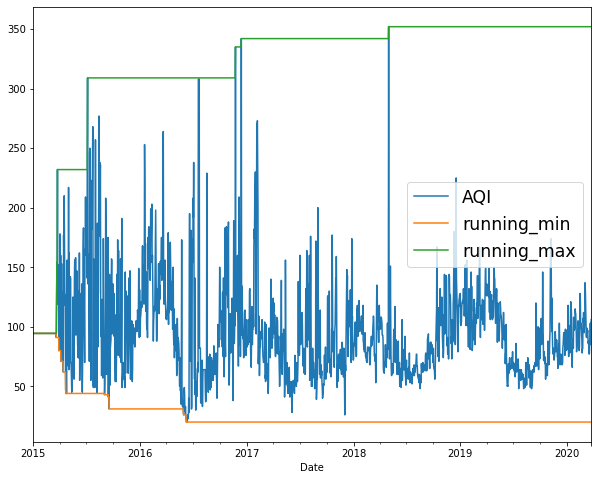

In [ ]:
bl_bangalore["running_min"] = bl_bangalore["AQI"].expanding().min()  # same as cummin()
bl_bangalore["running_max"] = bl_bangalore["AQI"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 8))

bl_bangalore[["AQI", "running_min", "running_max"]].plot(ax=ax)
plt.legend(fontsize="xx-large");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


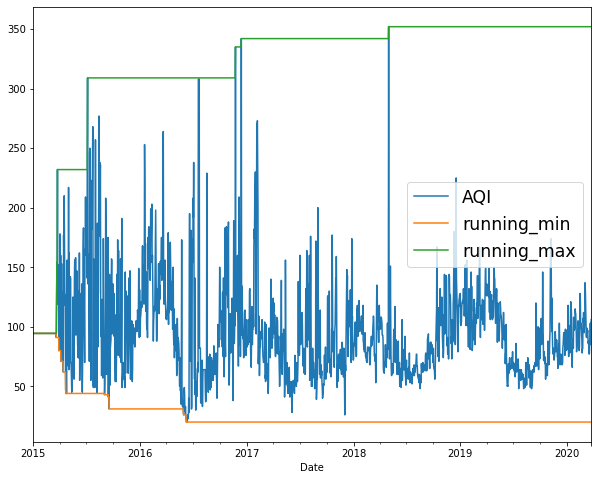

In [ ]:
al_bangalore["running_min"] = al_bangalore["AQI"].expanding().min()  # same as cummin()
al_bangalore["running_max"] = al_bangalore["AQI"].expanding().max()

fig, ax = plt.subplots(figsize=(10, 8))

bl_bangalore[["AQI", "running_min", "running_max"]].plot(ax=ax)
plt.legend(fontsize="xx-large");

In [ ]:
data1=al_bangalore["AQI"].resample("7D").agg(["mean", "median", "std"])

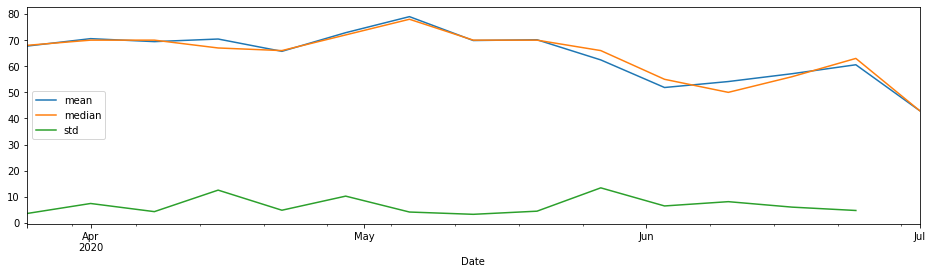

In [ ]:
data1.plot(figsize=(16, 4));

In [ ]:
bl_week=data_month=bl_bangalore.resample("7D").mean()
al_week=data_month=al_bangalore.resample("7D").mean()


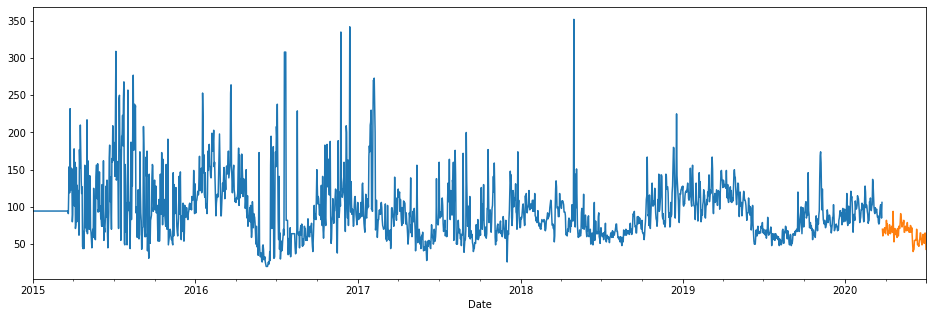

In [ ]:
bl_bangalore["AQI"].plot(figsize=(16, 5))
al_bangalore["AQI"].plot()

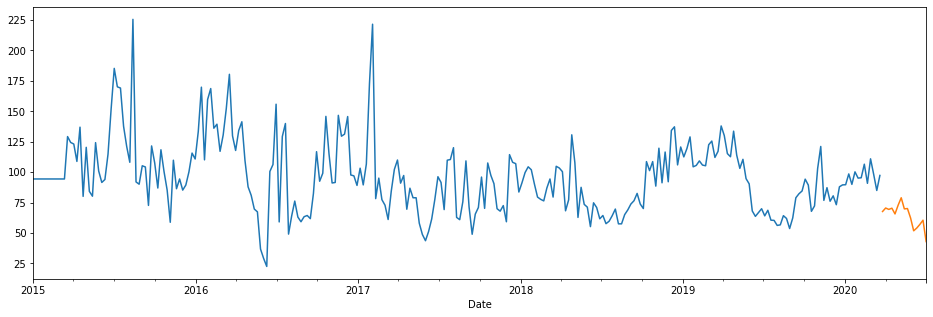

In [ ]:
bl_week["AQI"].plot(figsize=(16, 5))
al_week["AQI"].plot()

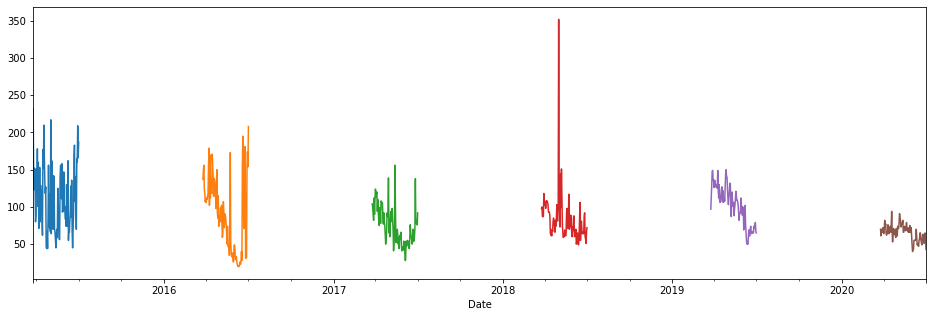

In [ ]:
bl_bangalore["2015-03-25":"2015-07-01"]["AQI"].plot(figsize=(16, 5))
bl_bangalore["2016-03-25":"2016-07-01"]["AQI"].plot()
bl_bangalore["2017-03-25":"2017-07-01"]["AQI"].plot()
bl_bangalore["2018-03-25":"2018-07-01"]["AQI"].plot()
bl_bangalore["2019-03-25":"2019-07-01"]["AQI"].plot()

al_bangalore["AQI"].plot()

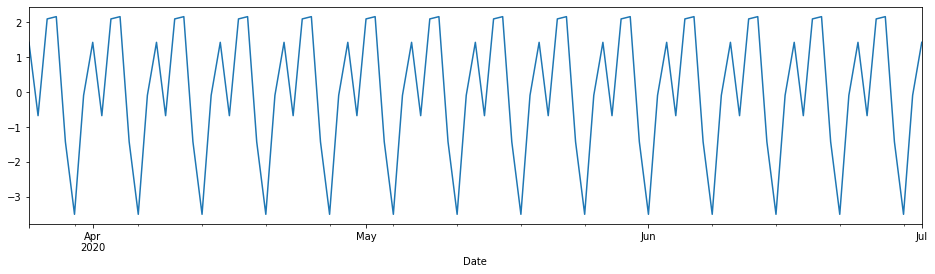

In [ ]:
import statsmodels.api as sm
from matplotlib import rcParams

decomposition = sm.tsa.seasonal_decompose(al_bangalore["AQI"])

rcParams["figure.figsize"] = 16, 4
decomposition.seasonal.plot();

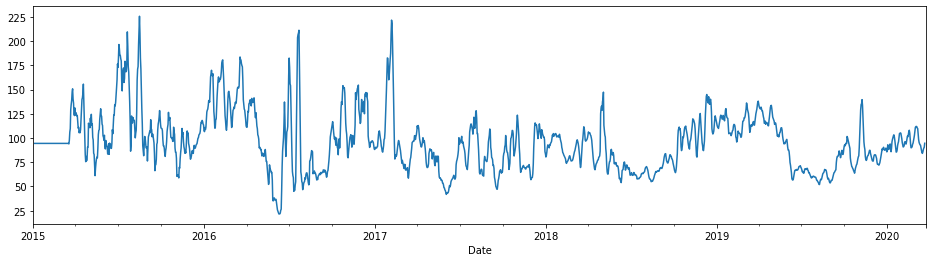

In [ ]:
decomposition = sm.tsa.seasonal_decompose(bl_bangalore["AQI"].dropna())

decomposition.trend.plot();

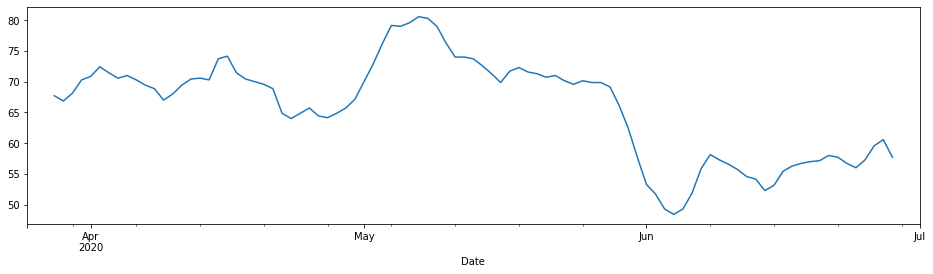

In [ ]:
decomposition = sm.tsa.seasonal_decompose(al_bangalore["AQI"].dropna())

decomposition.trend.plot();

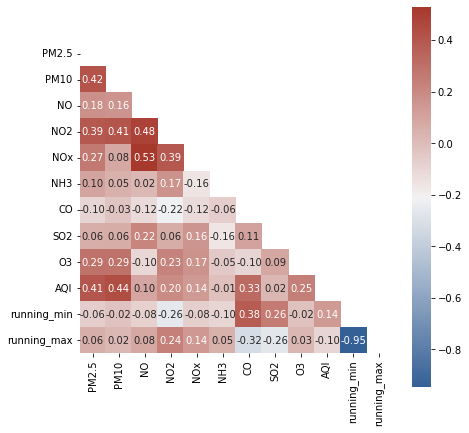

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = bl_bangalore.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

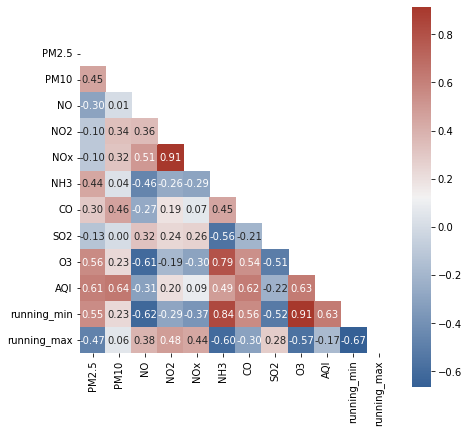

In [ ]:
# Create a custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

# Compute corr matrix
matrix = al_bangalore.corr(method="pearson")
# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(matrix, mask=mask, cmap=cmap, square=True, annot=True, fmt=".2f", ax=ax)
plt.show();

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


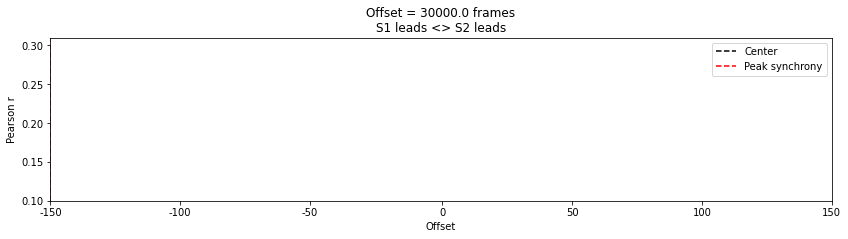

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_bangalore['NO2']
d2 = al_bangalore['AQI']
seconds = 1000
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


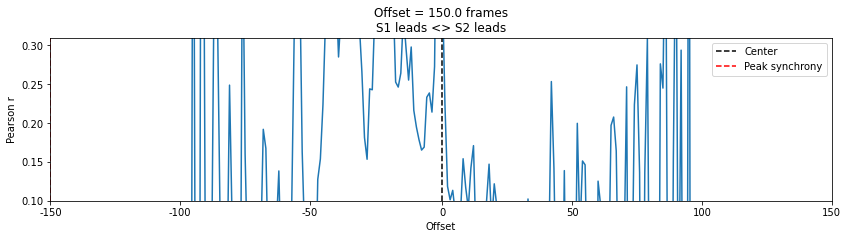

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_bangalore['PM2.5']
d2 = al_bangalore['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


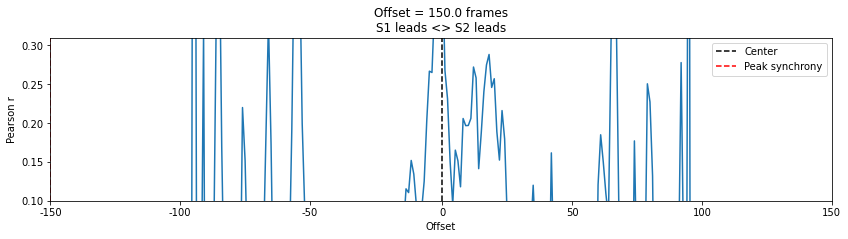

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_bangalore['PM10']
d2 = al_bangalore['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


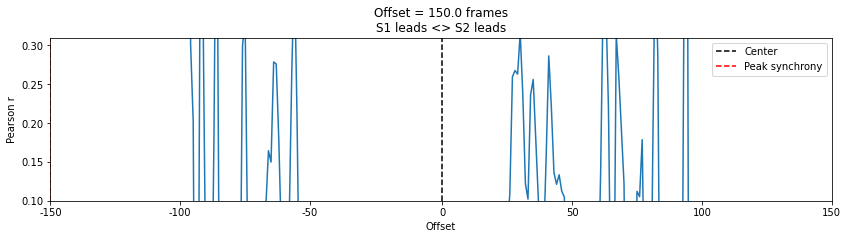

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_bangalore['SO2']
d2 = al_bangalore['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


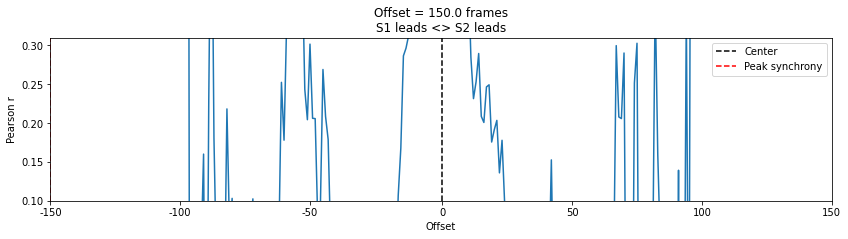

In [ ]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = al_bangalore['CO']
d2 = al_bangalore['AQI']
seconds = 5
fps = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nS1 leads <> S2 leads',ylim=[.1,.31],xlim=[0,301], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

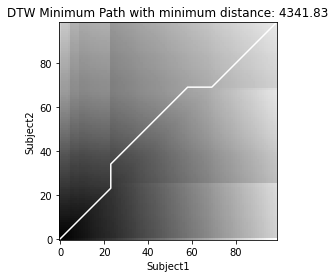

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_bangalore['PM2.5'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

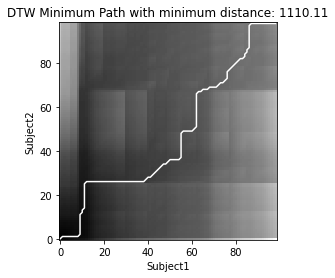

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_bangalore['PM10'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

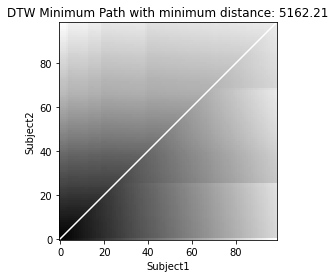

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_bangalore['NO2'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

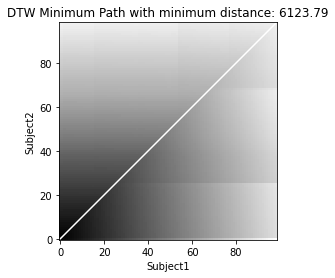

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_bangalore['NO'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

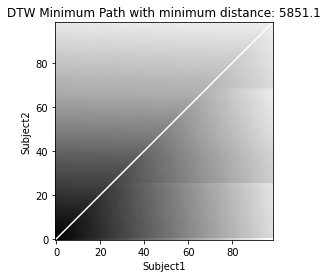

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_bangalore['SO2'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

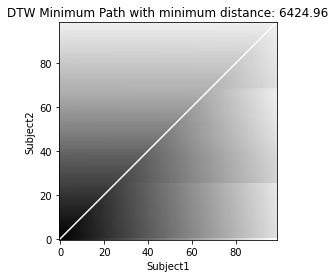

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_bangalore['CO'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

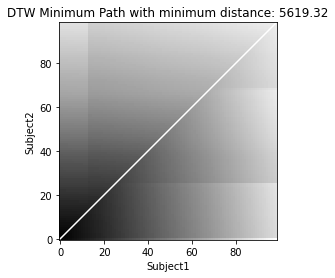

In [ ]:
from dtw import dtw,accelerated_dtw

d1 = al_bangalore['NH3'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('Subject1')
plt.ylabel('Subject2')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

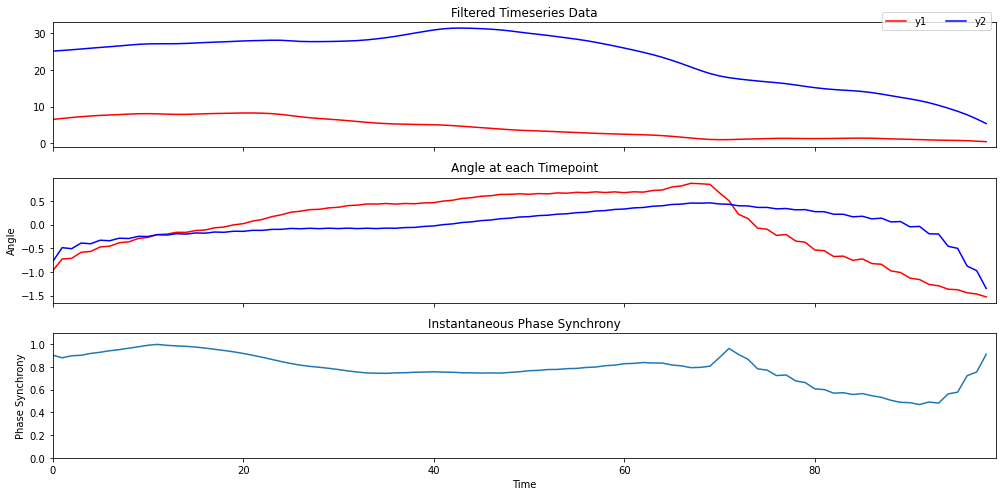

In [ ]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_bangalore['PM2.5'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

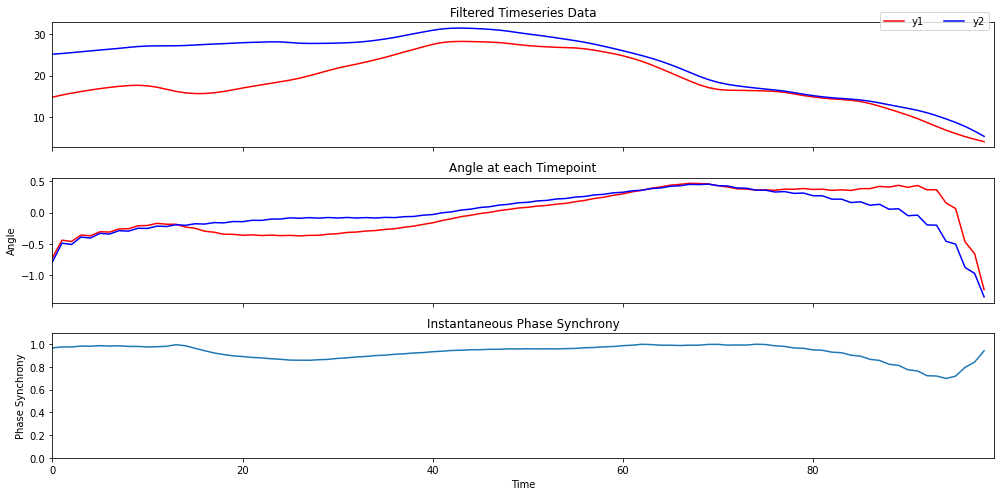

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_bangalore['PM10'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

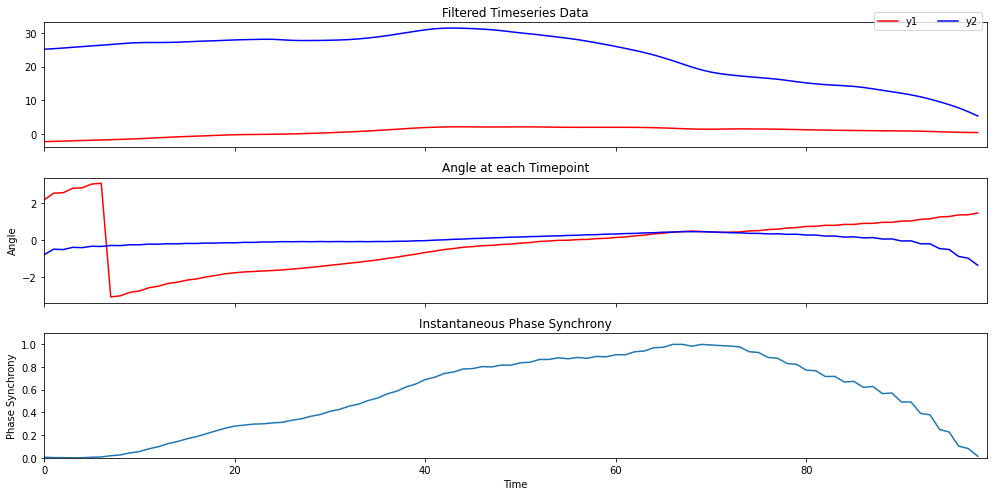

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_bangalore['NO2'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

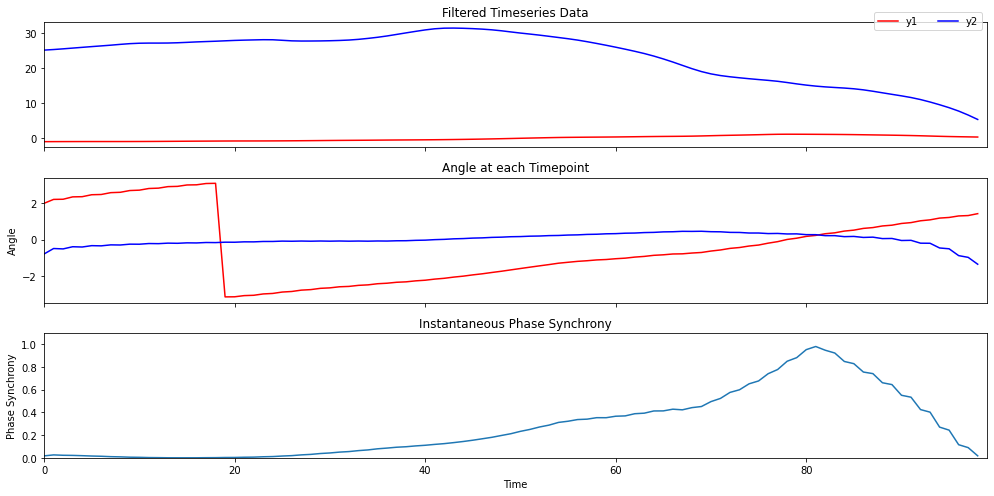

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_bangalore['NO'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

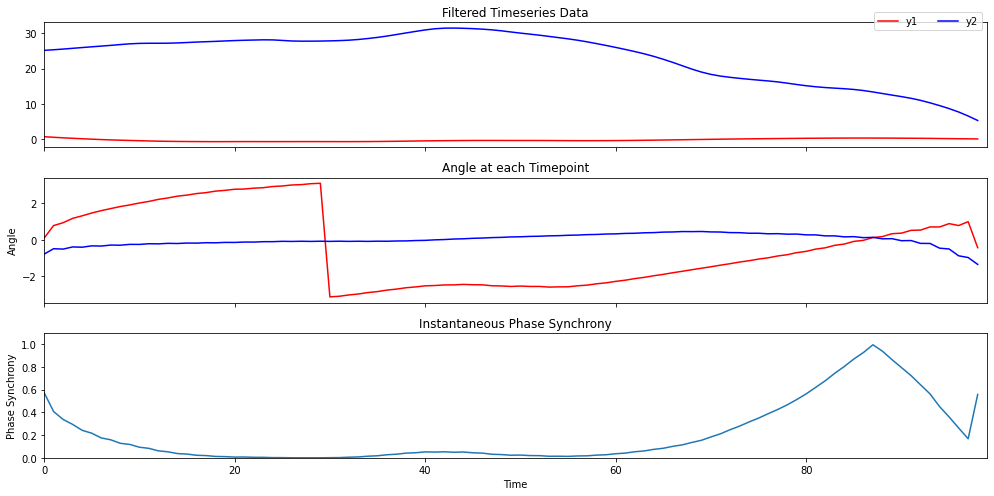

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_bangalore['SO2'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

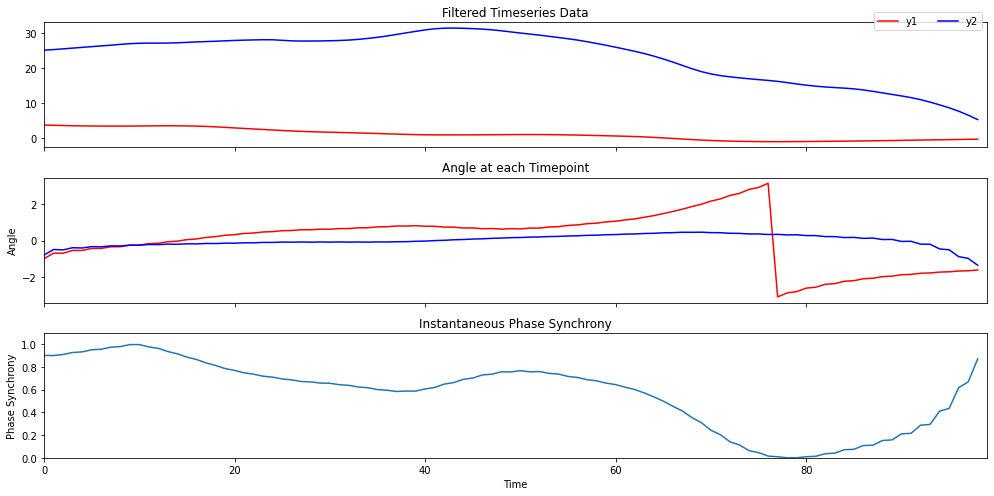

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_bangalore['NH3'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

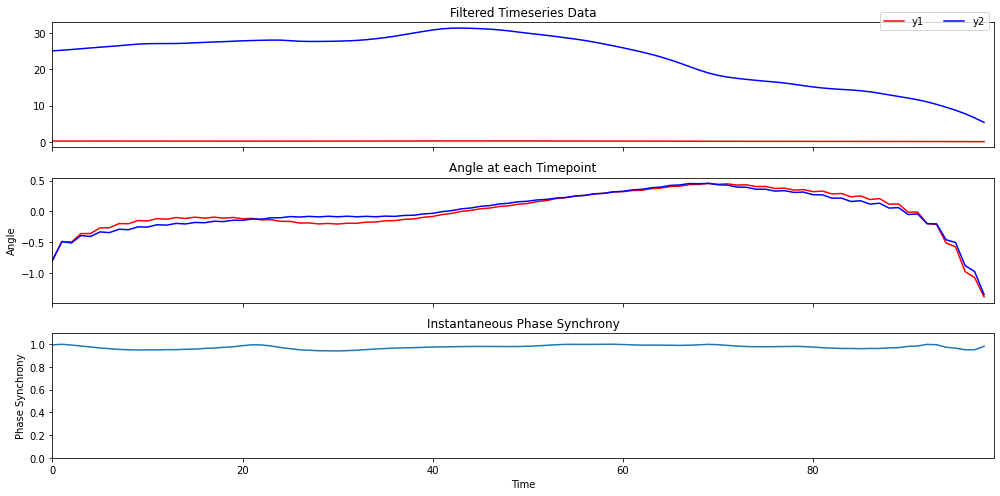

In [ ]:
lowcut  = .01
highcut = .5
fs = 30.
order = 1
d1 = al_bangalore['CO'].interpolate().values
d2 = al_bangalore['AQI'].interpolate().values
y1 = butter_bandpass_filter(d1,lowcut=lowcut,highcut=highcut,fs=fs,order=order)
y2 = butter_bandpass_filter(d2,lowcut=lowcut,highcut=highcut,fs=fs,order=order)

al1 = np.angle(hilbert(y1),deg=False)
al2 = np.angle(hilbert(y2),deg=False)
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
N = len(al1)

# Plot results
f,ax = plt.subplots(3,1,figsize=(14,7),sharex=True)
ax[0].plot(y1,color='r',label='y1')
ax[0].plot(y2,color='b',label='y2')
ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
ax[0].set(xlim=[0,N], title='Filtered Timeseries Data')
ax[1].plot(al1,color='r')
ax[1].plot(al2,color='b')
ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
phase_synchrony = 1-np.sin(np.abs(al1-al2)/2)
ax[2].plot(phase_synchrony)
ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time',ylabel='Phase Synchrony')
plt.tight_layout()
plt.show()

In [ ]:
# Windowed time lagged cross correlation
seconds = 5
fps = 30
no_splits = 20
samples_per_split = al_bangalore.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = al_bangalore['PM2.5'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = al_bangalore['AQI'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# Rolling window time lagged cross correlation
seconds = 5
fps = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = al_bangalore['PM2.5'].iloc[t_start:t_end]
    d2 = al_bangalore['AQI'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

TypeError: ignored

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data_bangalore['AQI'])

In [ ]:
data_week=data_bangalore.resample("7D").mean()

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data_week['AQI'])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_week['AQI'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

In [ ]:
data_week['forecast']=model_fit.predict(start=250,end=285,dynamic=True)
data_week[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_week['AQI'],order=(1, 1, 1),seasonal_order=(1,1,1,52))
results=model.fit()
data_week['forecast']=results.predict(start=250,end=285,dynamic=True)
data_week[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[data_week.index[-1]+ DateOffset(weeks=x)for x in range(0,52)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_week.columns)

future_datest_df.tail()

future_df=pd.concat([data_week,future_datest_df])

future_df['forecast'] = results.predict(start = 291, end = 320, dynamic= True)
future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

In [ ]:
data_month=data_bangalore.resample("M").mean()

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data_month['AQI'])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_month['AQI'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

In [ ]:
data_month['forecast']=model_fit.predict(start=50,end=66,dynamic=True)
data_month[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data_month['AQI'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
data_month['forecast']=results.predict(start=50,end=66,dynamic=True)
data_month[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[data_month.index[-1]+ DateOffset(months=x)for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_month.columns)

future_datest_df.tail()

future_df=pd.concat([data_month,future_datest_df])

future_df['forecast'] = results.predict(start = 67, end = 79, dynamic= True)
future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

In [ ]:
future_df["2020-08-01":"2021-08-01"]["forecast"]

In [ ]:
data_month["2019-08-01":"2020-08-01"]["AQI"]

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(data_bangalore['AQI'])

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(data_bangalore['AQI'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

In [ ]:
data_bangalore['forecast']=model_fit.predict(start=1800,end=2009,dynamic=True)
data_bangalore[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
# import statsmodels.api as sm
# model=sm.tsa.statespace.SARIMAX(data_bangalore['AQI'],order=(1, 1, 1),seasonal_order=(1,1,1,365))
# results=model.fit()
# data_bangalore['forecast']=results.predict(start=1800,end=2009,dynamic=True)
# data_bangalore[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
# from pandas.tseries.offsets import DateOffset
# future_dates=[data_bangalore.index[-1]+ DateOffset(days=x)for x in range(0,200)]
# future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data_month.columns)

# future_datest_df.tail()

# future_df=pd.concat([data_bangalore,future_datest_df])

# future_df['forecast'] = results.predict(start = 2010, end = 2210, dynamic= True)
# future_df[['AQI', 'forecast']].plot(figsize=(12, 8))

In [ ]:

# !pip install kats

In [ ]:
# from kats.models.prophet import ProphetModel, ProphetParams

# # Specify parameters
# params = ProphetParams(seasonality_mode="multiplicative")

# # Create a model instance
# m = ProphetModel(data_week, params)

# # Fit mode
# m.fit()

# # Forecast
# fcst = m.predict(steps=30, freq="MS")
# fcst

In [ ]:
!pip install pycaret


In [ ]:
# import the regression module
from pycaret.regression import *
# initialize setup
s = setup(data = train, test_data = test, target = 'Passengers', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123)

In [ ]:
data=pd.read_csv("city_day.csv")

data_pred=data.loc[data['City']=='bangalore']

In [ ]:
data_pred.drop(["Benzene", "Toluene", "Xylene", "AQI_Bucket", "City"], axis=1, inplace=True)
data_pred["Date"] = pd.to_datetime(data_pred["Date"], format="%Y-%m-%d", errors="coerce")
assert data_pred["Date"].dtype == "datetime64[ns]"

In [ ]:
data_pred=data_pred.reset_index()
data_pred

In [ ]:
# data_pred["Date"]=data_pred["Date"].resample("M").mean()

In [ ]:
# extract month and year from dates
data_pred['Month'] = [i.month for i in data_pred['Date']]
data_pred['Year'] = [i.year for i in data_pred['Date']]
# create a sequence of numbers
data_pred['Series'] = np.arange(1,len(data)+1)
# drop unnecessary columns and re-arrange
data_pred.drop(['Date', 'MA12'], axis=1, inplace=True)
data = data[['Series', 'Year', 'Month', 'Passengers']] 
# check the head of the dataset
data.head()